<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#fff;">------------------

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#fff;">------------------
<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#fa9200;">Loan Default Prediction
    
    
    
    

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Dataset Information:


#### The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Problem Statement:
    

#### The consumer credit department of a bank has the goal of streamlining the approval process for home equity lines of credit.  In order to achieve this, they plan to implement the guidelines outlined in the Equal Credit Opportunity Act.  They would like to develop a credit scoring model that is both statistically sound and derived from empirical data.  This model will be constructed using information gathered from recent applicants who have been granted credit through the current loan underwriting process.  While the model will utilize predictive modeling techniques, it must also remain interpretable enough to offer an explanation for any unfavorable actions taken.


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Objective:

#### Build a classification model to predict clients who are likely to default on their loan and give recommendations.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Import libraries 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data

data_copy = data.copy()


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Data Overview

In [4]:
# Display first five rows

print(data.head(5))


   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  


In [5]:
# Display last 5 rows

print(data.tail(5))

      BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  


In [6]:
# Check the shape of the data

data.shape

(5960, 13)

In [7]:
# Look at the data value types present

data.dtypes.value_counts()



float64    9
int64      2
object     2
dtype: int64

In [8]:
# Look at the column lables of the dataset

data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [9]:
# Check info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The dataset has 5906 rows and 13 columns
#### - There looks to be some missing data
#### -  All but two columns are numerical


In [10]:
# Check for missing values in the dataset

missing_values=data.isnull().sum()
print(missing_values)


BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [11]:
# Check the percentage of missing values in the each column.

data = pd.read_csv("hmeq.csv")
missing_values = data.isnull().sum()
percentage_missing = (missing_values / len(data)) * 100
print(percentage_missing)


BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - There are a large number of missing values in the dataset, the greatest being the debt to income ratio followed by derogatory reports.
#### - We do have all of the data on the number of defaults and the amount of the approved loans.

In [12]:
# We can convert the object type columns to catagories

cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

In [13]:
cols

['REASON', 'JOB', 'BAD']

In [14]:
# Changing the data type of object type column to category. hint use astype() function

columns_to_convert = ['REASON', 'JOB', 'BAD']
data[columns_to_convert] = data[columns_to_convert].astype('category')



In [15]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


#### BAD, REASON, and JOB have been changed to catagories.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Summary Statistics

In [16]:
# Create numerical columns

num_cols = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

# Create catagorical columns

cat_cols = ['BAD','REASON','JOB']

In [17]:
# Analyze the summary statistics for numerical variables

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The average home equity loan is around 18,600
#### - The average home value seems very low at 101,776
#### - YOJ has a good average at just under 9 years.
#### - DEROG & DELINQ are low at just .25 and .45
#### - DEBTINC average is 33.78

In [18]:
# Check summary for catagorical data

categorical_columns = ['REASON', 'JOB', 'BAD']
categorical_data = data[categorical_columns]

summary = categorical_data.describe()
print(summary)


         REASON    JOB   BAD
count      5708   5681  5960
unique        2      6     2
top     DebtCon  Other     0
freq       3928   2388  4771


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - There are 6 unique values for JOB and 2 for REASON and BAD
#### - The top reason for the loan was debt consolidation
#### - BAD had two values (0-the loan was paid or 1-loan defaulted)

In [19]:
# Checking the count of unique values in each categorical column 


categorical_columns = ['REASON', 'JOB', 'BAD']
categorical_data = data[categorical_columns]

for column in categorical_data.columns:
    unique_values = categorical_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in REASON: ['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']
Unique values in JOB: ['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
Unique values in BAD: [1, 0]
Categories (2, int64): [0, 1]


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - There are 2 catagory values for REASON, they are debt consolidation and home improvement
#### - There are 5 main values for JOB:  Self, ProfExe, Mgr, Sales, & Office.  The other variable is NaN
#### - I don't believe the JOB values are very imformative as there is a very small list of options. I doubt they are a good indicator of loan default.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Exploratory Data Analysis (EDA) and Visualization

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Univariate Analysis


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Analysis of Numerical Data



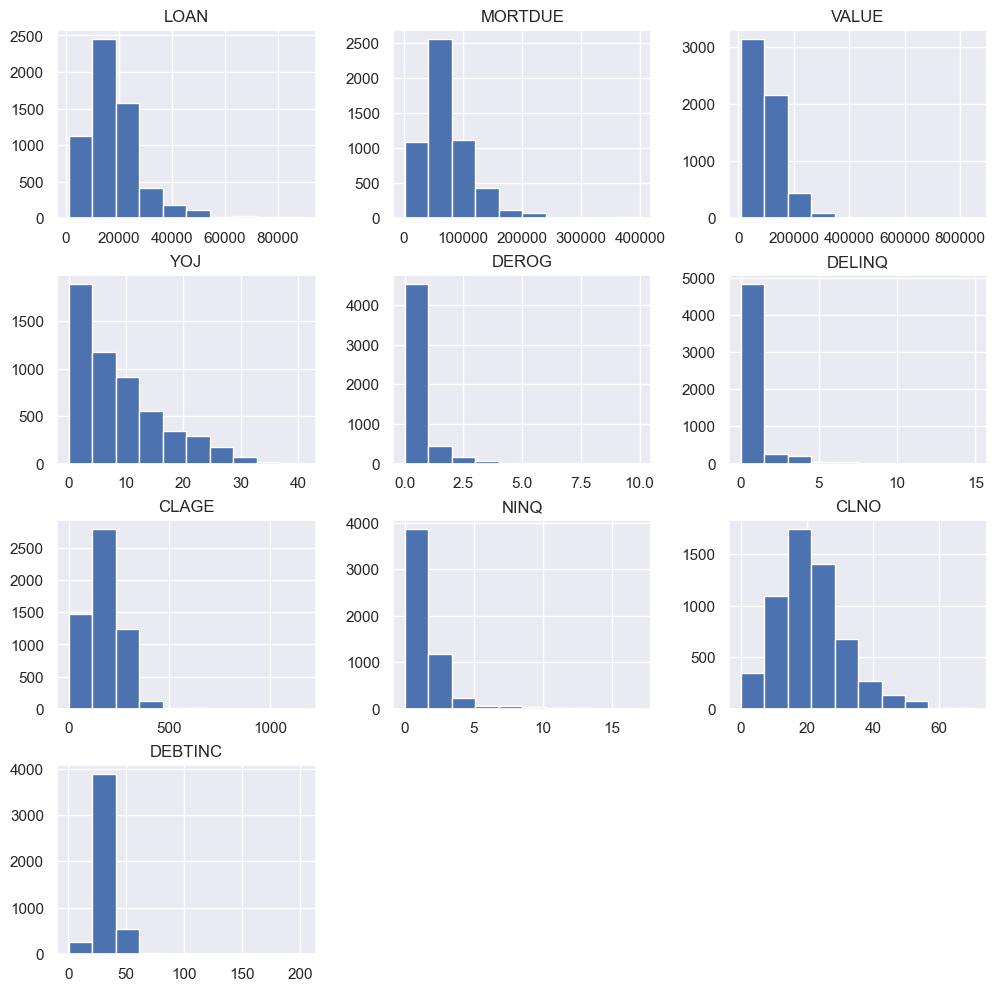

In [20]:
data[num_cols].hist(figsize = (12,12))
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")

    plt.show()




<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Most loan amounts are under 40,0000
#### - Most mortgage balances are under 150,0000
#### - Most homes are valued under 200,000
#### - A large amount of customers have been at their current job just a few years or less
#### - The number of deliquent and derogatory items is small

In [106]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,  # Number of rows of the subplot grid= 2
                                           sharex=True,  # x-axis will be shared among all subplots
                                           gridspec_kw={"height_ratios": (.25, .75)},
                                           figsize=figsize
                                           )  # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='springgreen')  # boxplot with green color and a star indicating the mean value
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins, color='blue') if bins else sns.distplot(feature, kde=False, ax=ax_hist2, color='blue')  # histogram with blue color
    ax_hist2.axvline(np.mean(feature), color='gold', linestyle='--')  # add mean to the histogram with gold color and dashed linestyle
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')  # add median to the histogram with black color and solid linestyle
    
    plt.show()


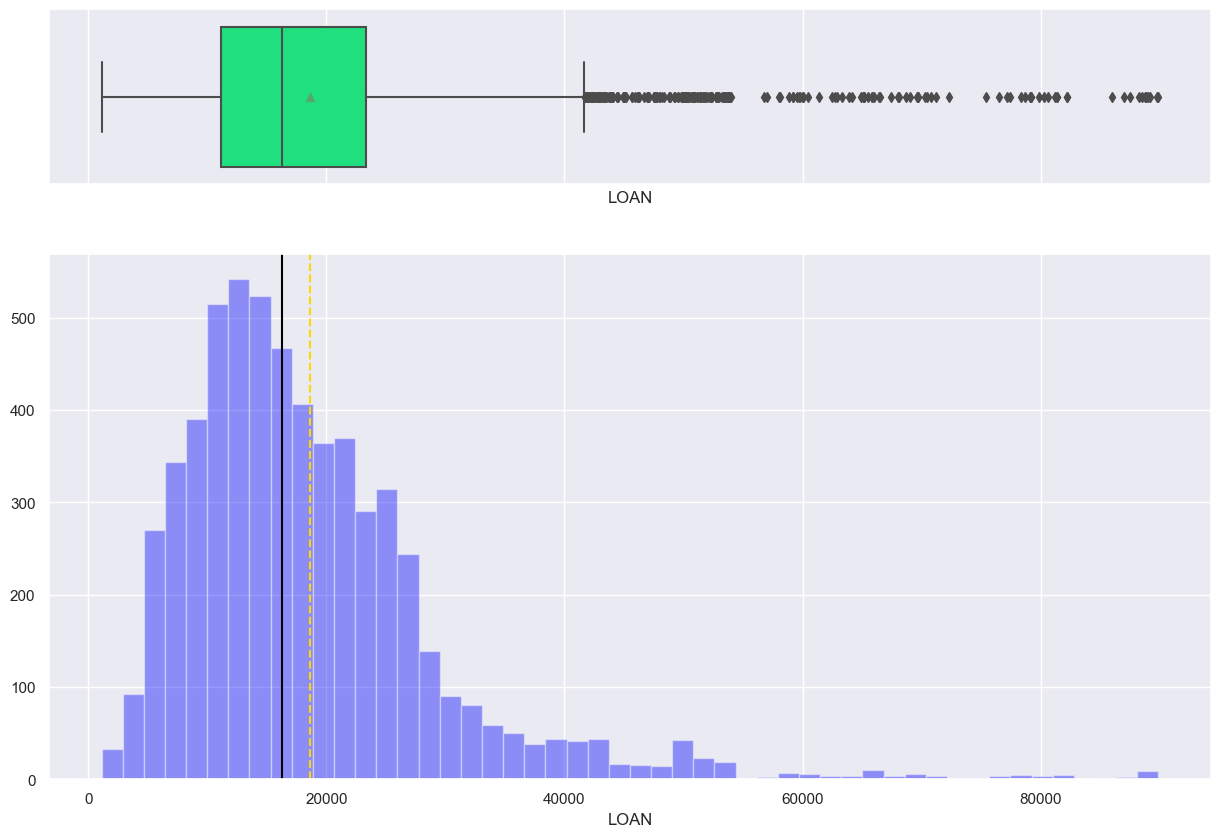

In [22]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The majority of loans were 10,000 - 30,000.
#### - I would like to learn if there was a correlation between the loan amount and default.


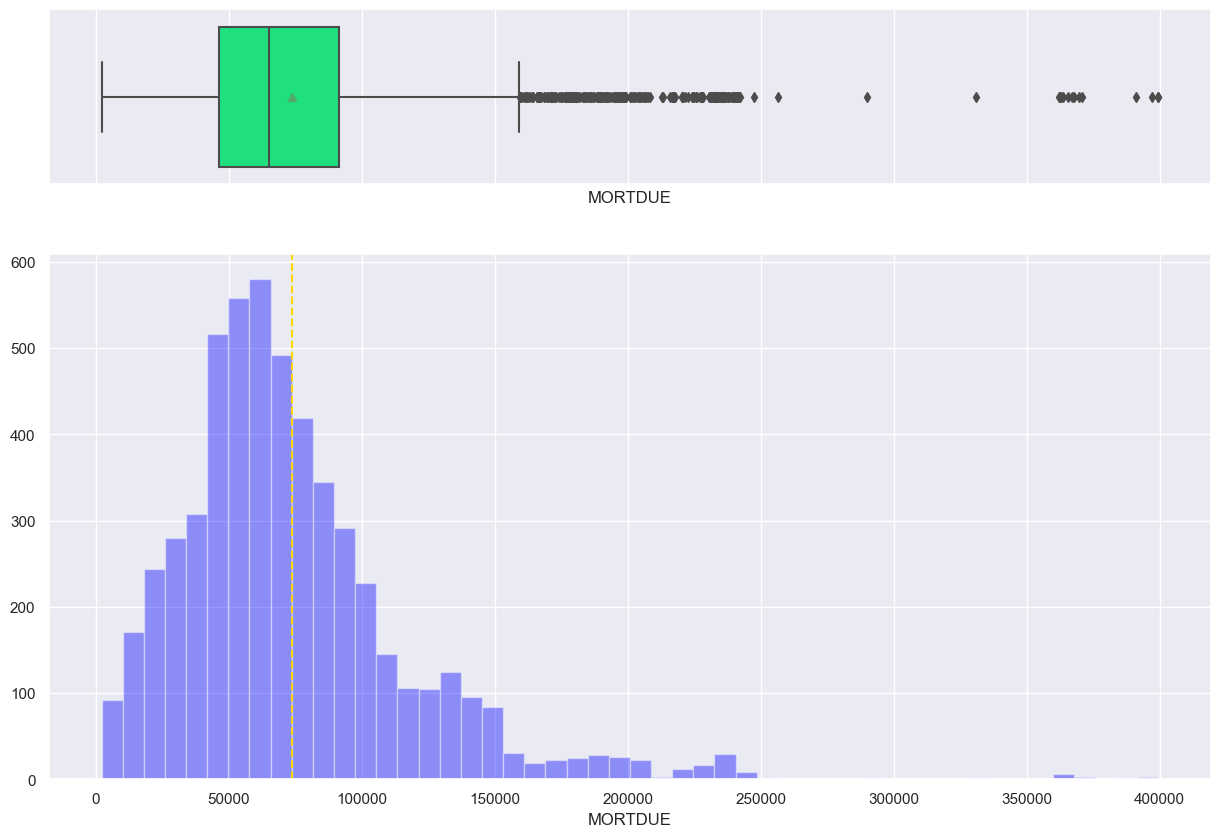

In [23]:
# Build the histogram boxplot for MORTDUE
histogram_boxplot(data['MORTDUE'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Most 1st mortgage balances were between 30,000 and 130,0000.  The median being about 80,000.

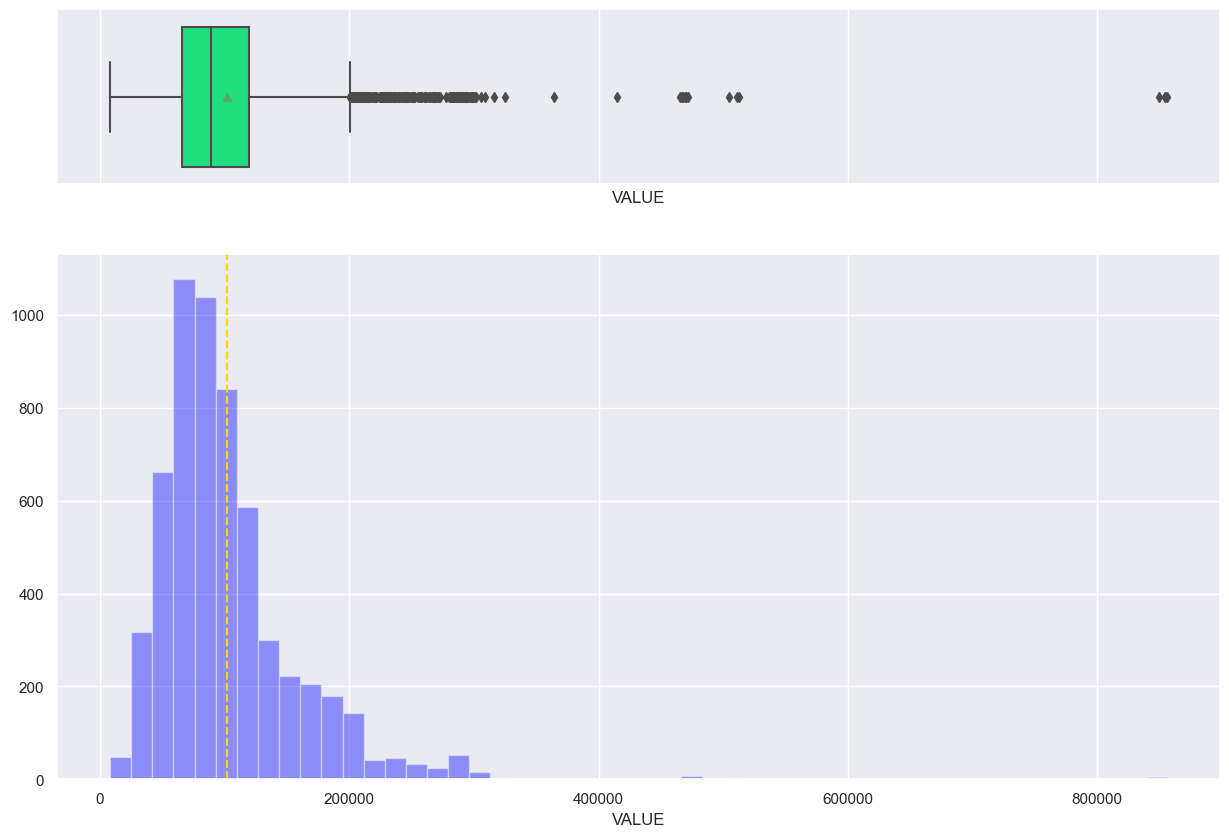

In [24]:
# Build the histogram boxplot for VALUE
histogram_boxplot(data['VALUE'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The value of most homes was just under 100,000

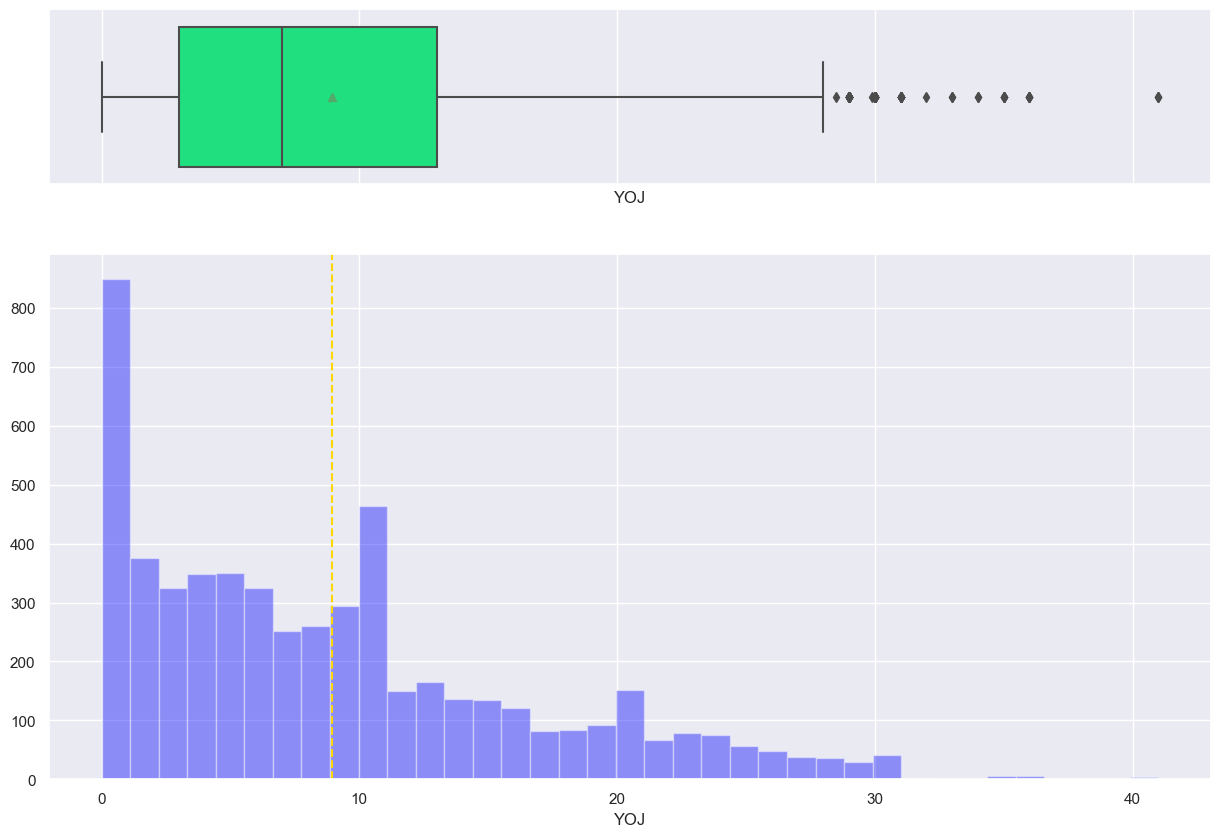

In [25]:
# Build the histogram boxplot for YOJ
histogram_boxplot(data['YOJ'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - A large number of people were at their job for under one year.
#### - The average time at their job was about 8 years.

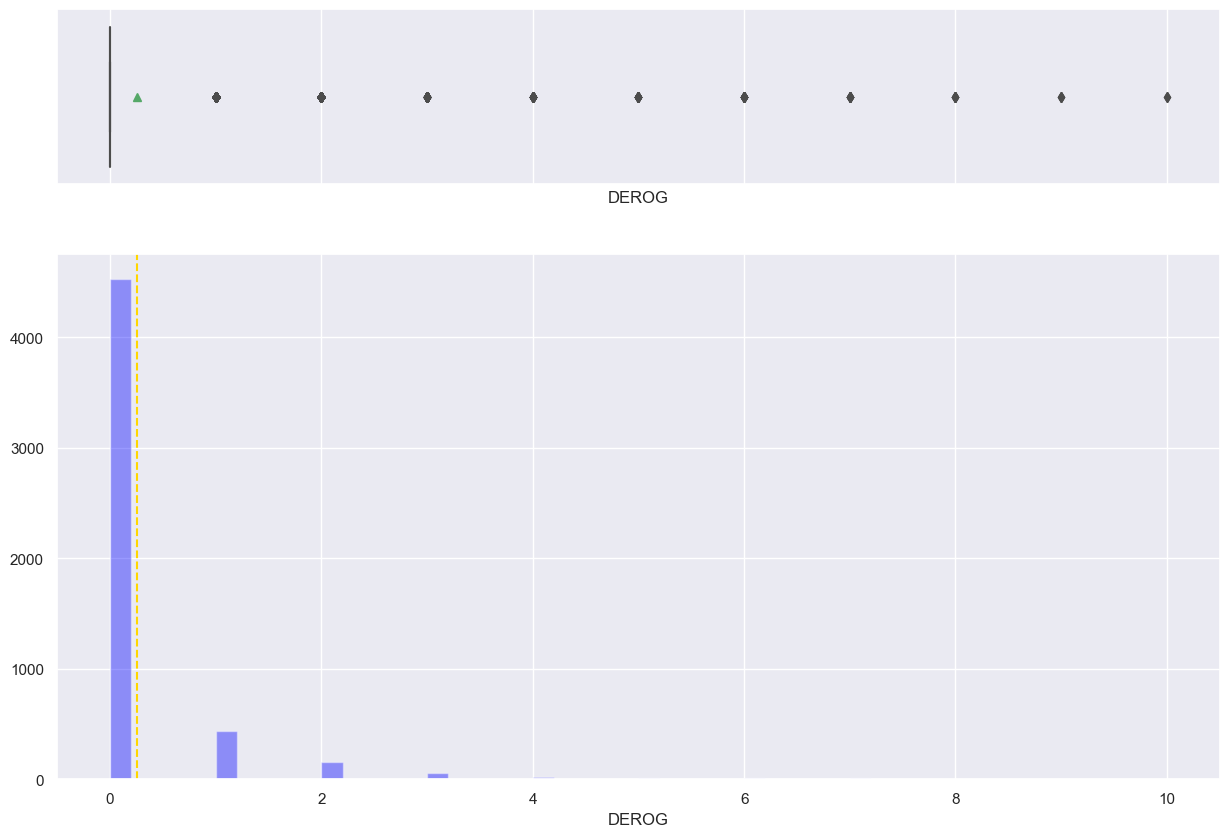

In [26]:
# Build the histogram boxplot for DEROG
histogram_boxplot(data['DEROG'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Very few people who had derogatory items were given a loan.  The average derogatory item was less than 1.

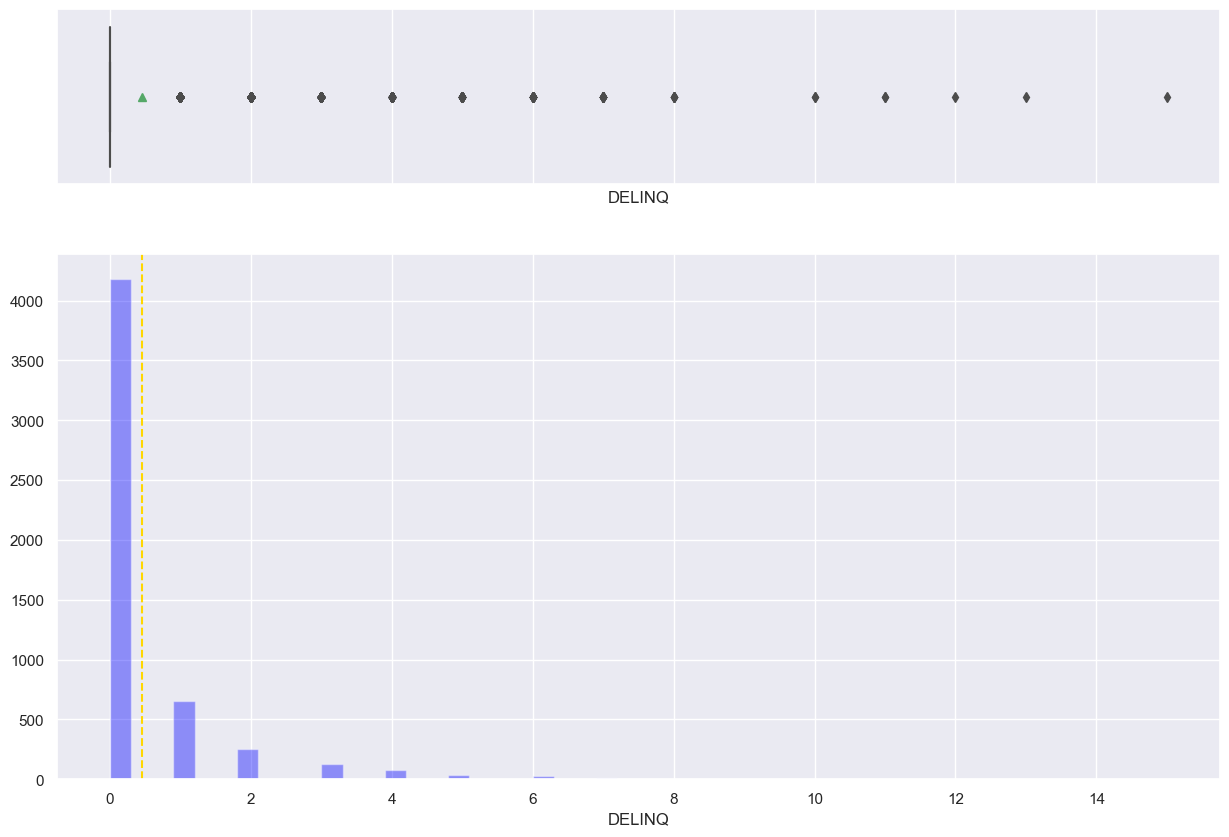

In [27]:
# Build the histogram boxplot for DELINQ
histogram_boxplot(data['DELINQ'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - the average number of people with a delinquent credit line was less than 1. 

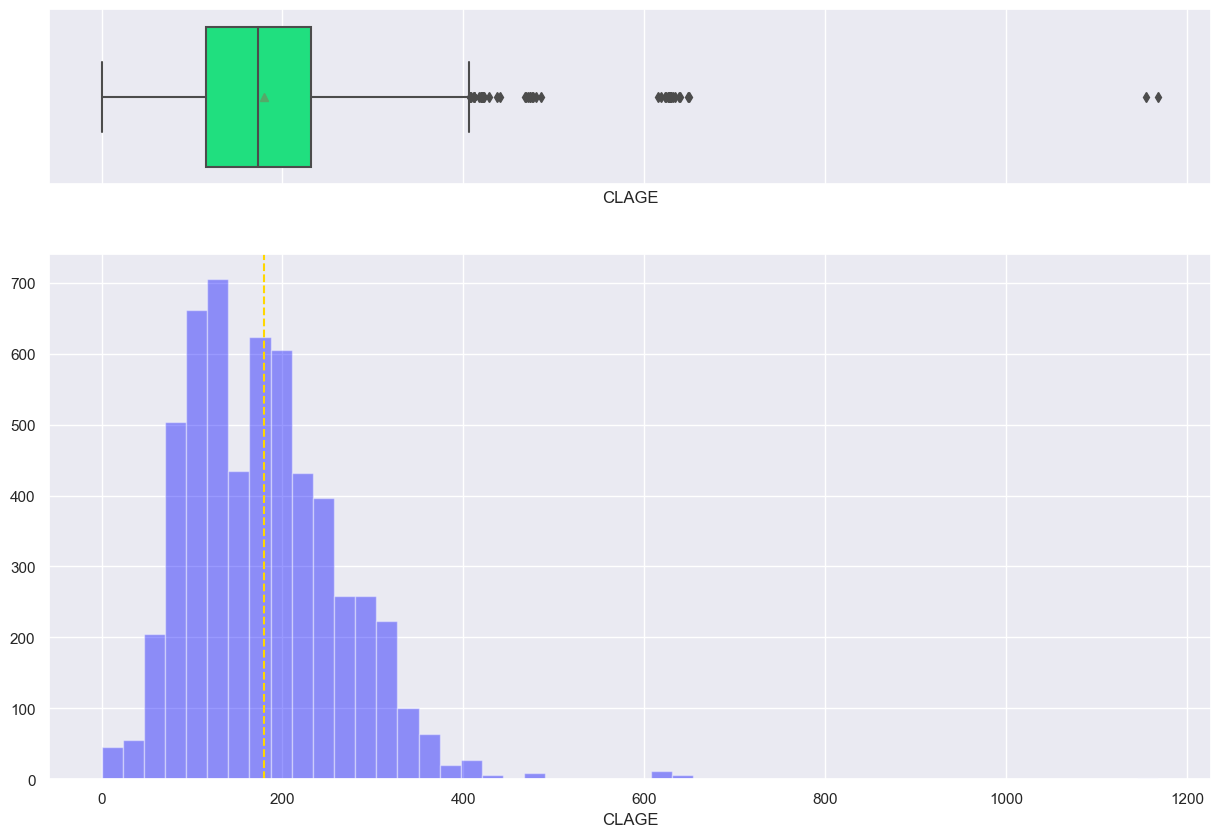

In [28]:
# Build the histogram boxplot for CLAGE
histogram_boxplot(data['CLAGE'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The average age of oldest credit line (in months) was just under 200.

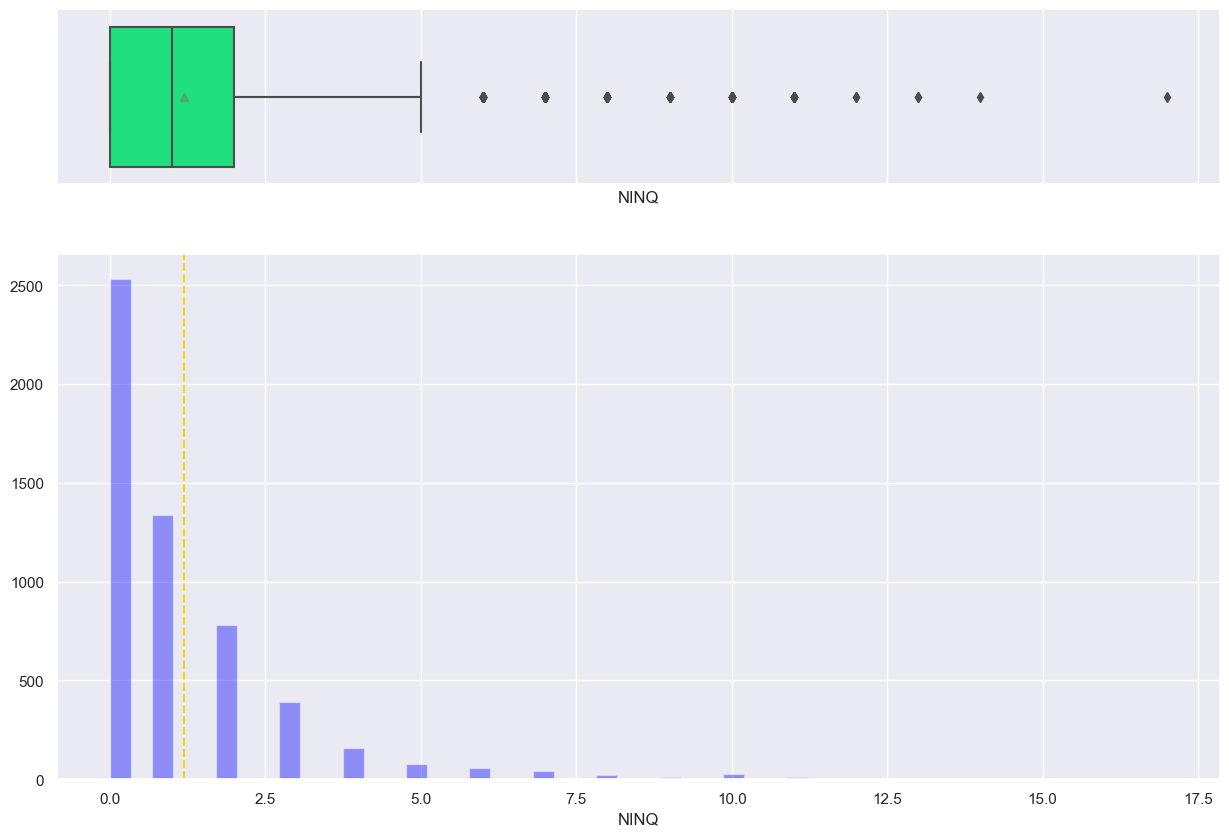

In [29]:
# Build the histogram boxplot for NINQ
histogram_boxplot(data['NINQ'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The average number of recent credit inquiries just over 1.

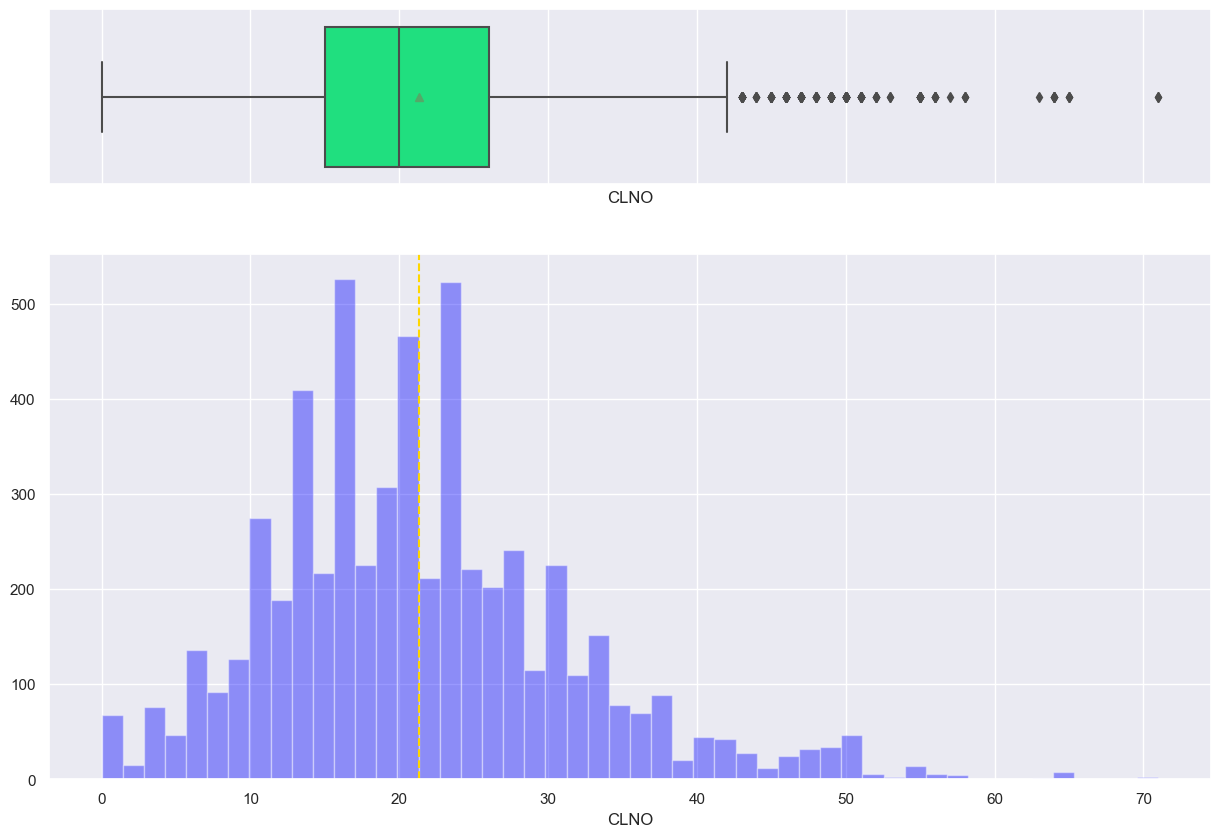

In [30]:
# Build the histogram boxplot for CLNO
histogram_boxplot(data['CLNO'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The average number of existing credit lines for each customer was just over 20.

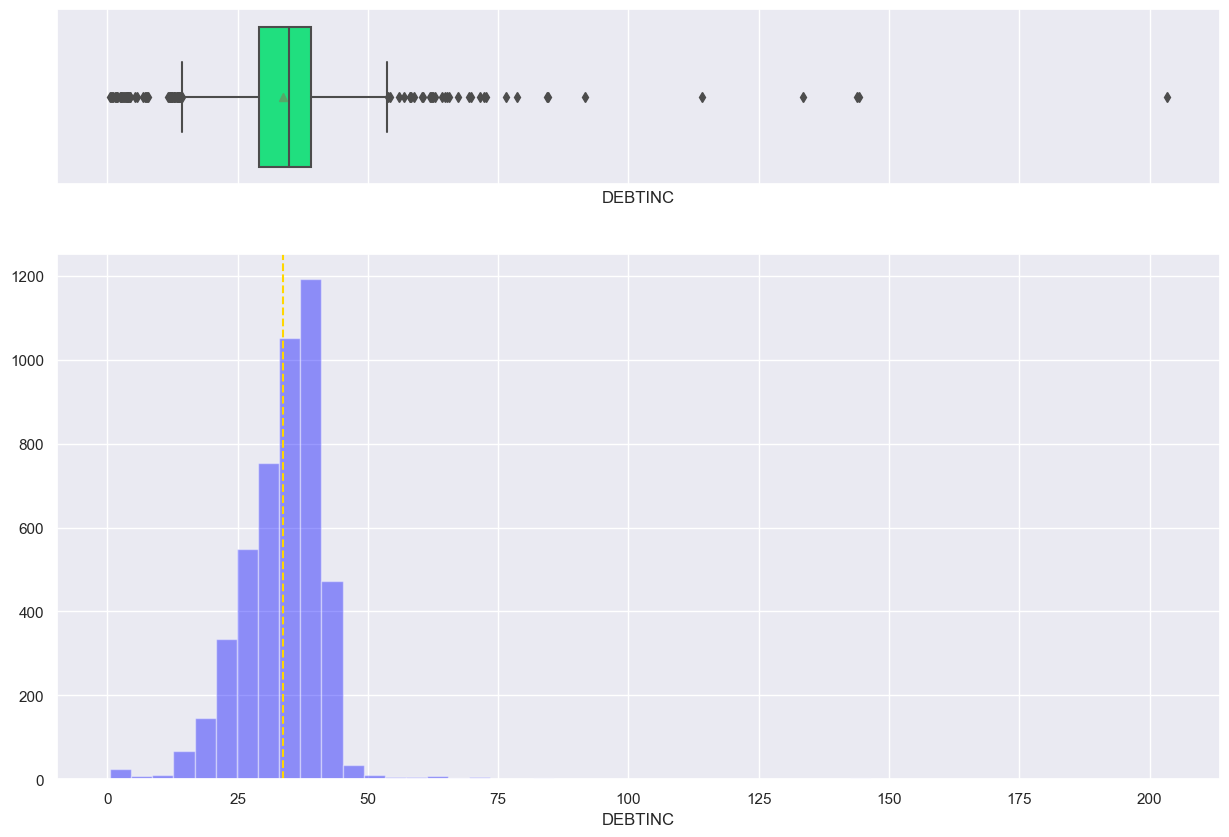

In [31]:
# Build the histogram boxplot for DEBTINC
histogram_boxplot(data['DEBTINC'])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The majority of debt-to-income ratio was between 20 and 45.

In [32]:
# Function to create barplots that indicate percentage for each category.
    
def perc_on_bar(plot, feature):
    '''
    plot: bar plot object
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature)  # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # height of the plot
        plot.annotate(percentage, (x, y), size=12)  # annotate the percentage

    plt.show()  # show the plot


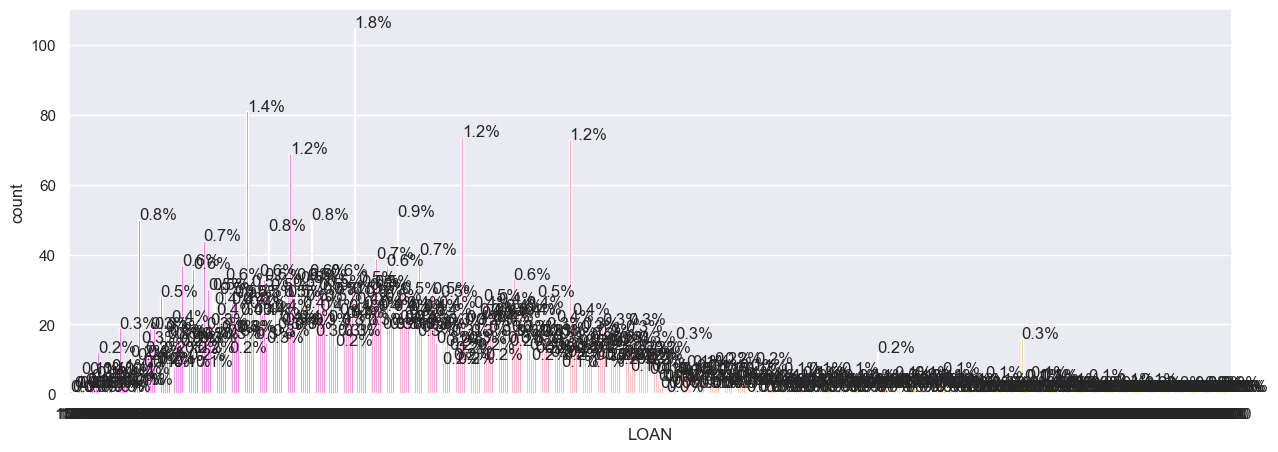

In [33]:
#Build barplot for LOAN


plt.figure(figsize=(15, 5))
ax = sns.countplot(data["LOAN"], palette='spring')
perc_on_bar(ax, data["LOAN"])

plt.show()



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - There are too many different loan values to effectively see the percentages.


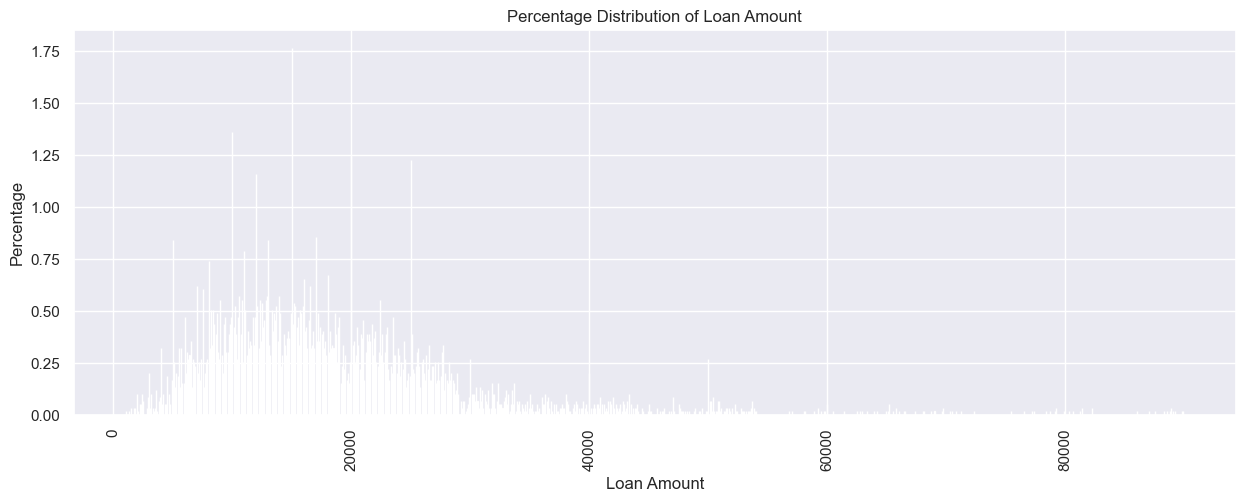

In [34]:
#utilize a stacked bar plot for better visualization
loan_counts = data["LOAN"].value_counts()
loan_perc = loan_counts / loan_counts.sum() * 100

plt.figure(figsize=(15, 5))
plt.bar(loan_perc.index, loan_perc, color=sns.color_palette("spring", len(loan_perc)))
plt.xlabel("Loan Amount")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Loan Amount")
plt.xticks(rotation=90)
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - There were a wide range of loan amounts, but most fell between 10,000 abd 30,0000
#### - There are too many unique values for LOAN.  In our comparisons I will group the amounts so we can visualize the data better.

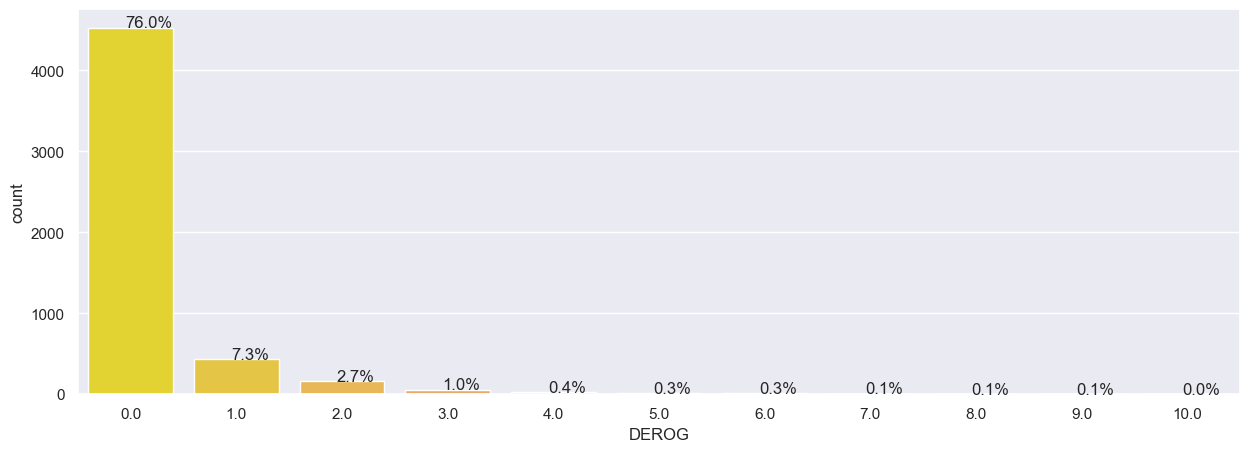

In [35]:
#Build barplot for DEROG

plt.figure(figsize=(15, 5))
ax = sns.countplot(data["DEROG"], palette='spring_r')
perc_on_bar(ax, data["DEROG"])

plt.show()




<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - About 75% of customers had 0 derogatory marks, 7.3% had 1, 2.7% had 2.  Only 1.4% had 3 or more.

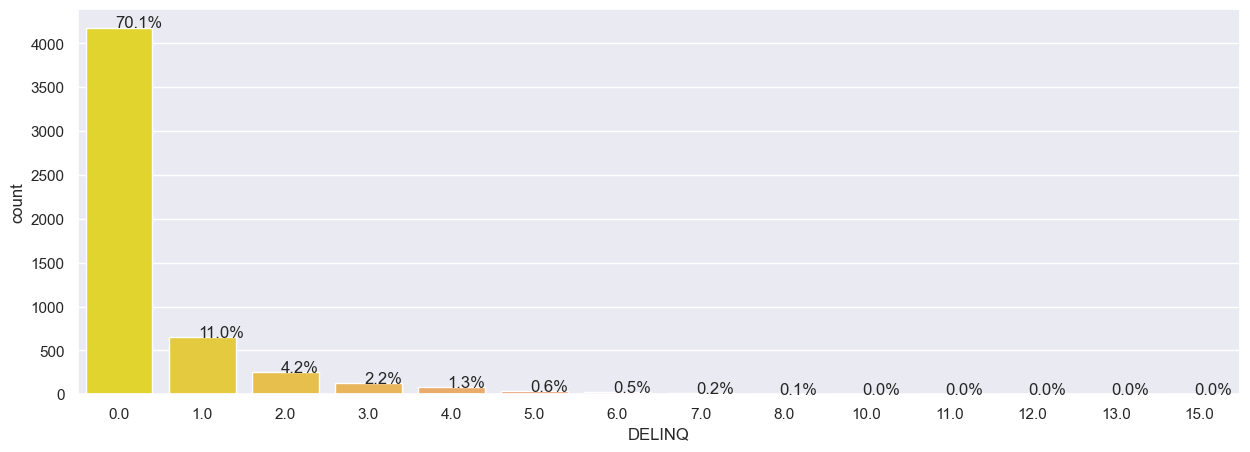

In [36]:
#Build barplot for DELINQ


plt.figure(figsize=(15, 5))
ax = sns.countplot(data["DELINQ"], palette='spring_r')
perc_on_bar(ax, data["DELINQ"])

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Just over 70% were current on all accouts, 11% had one delinquent payment, 4.2% had 2, and less than 5% had 3 or more.

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Analysis of Catagorical Data



<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Plot catagories BAD, REASON, and JOB


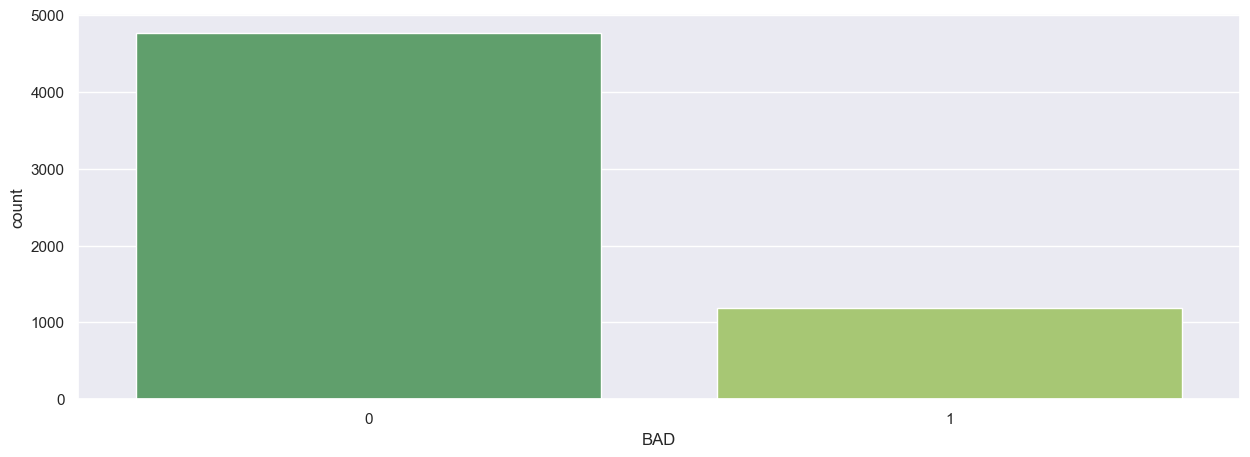

In [37]:
fig = plt.figure(figsize=(15, 5))
ax1 = sns.countplot(data["BAD"], palette='summer')
plt.savefig('BAD.png', dpi=1200)  # Save image for slideshow


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Approximately 20% defaulted on their loan, and 80% repaid the loan.

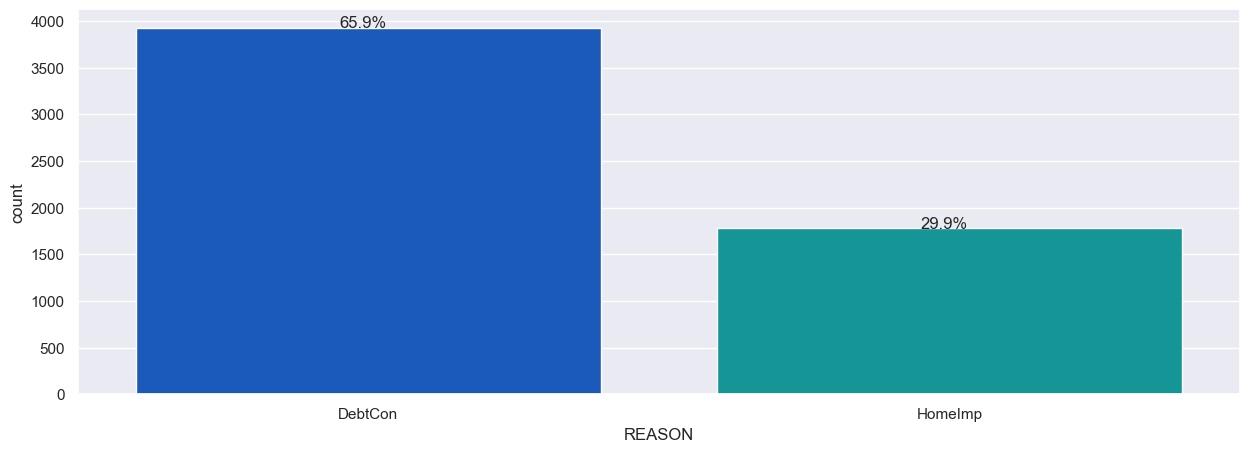

In [38]:
# Bar plot for 'REASON'
plt.figure(figsize=(15, 5))
ax2 = sns.countplot(data["REASON"], palette='winter')
perc_on_bar(ax2, data["REASON"])



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Approx 66% used the loan for debt consolidation.  About 30% used the loan for home improvements.

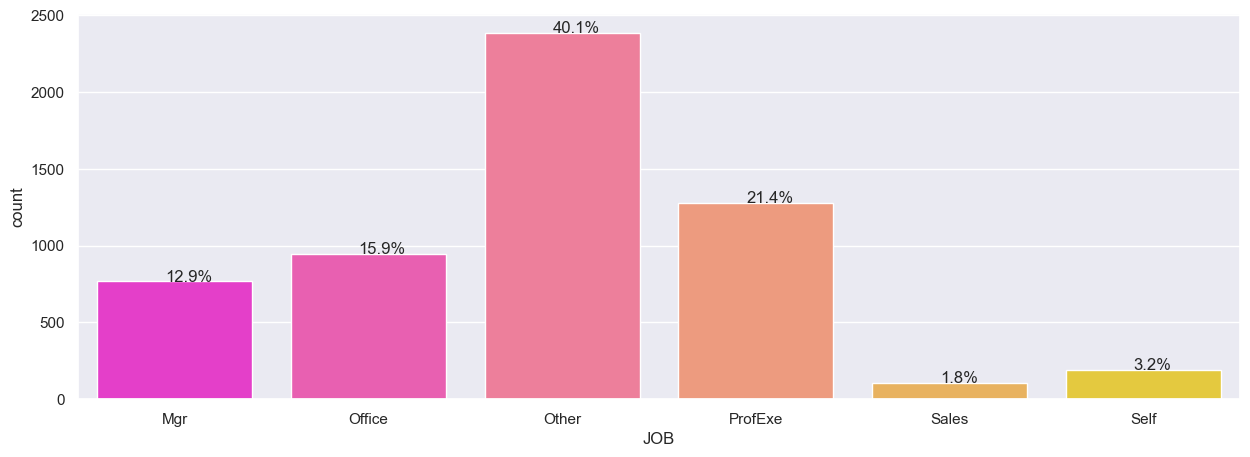

In [39]:
# Bar plot for 'JOB'
plt.figure(figsize=(15, 5))
ax3 = sns.countplot(data["JOB"], palette='spring')
perc_on_bar(ax3, data["JOB"])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - More than 40% of customers jobs were something other than the 6 options given.  This shows me the JOB catagory may not provide any useful information.  I believe income would have been a better choice to extract information from.

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Bivariate Analysis:  Continuous and Catagorical Variables




<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Analyze BAD vs LOAN



In [40]:
# let's make LOAN a little easier to visualize
# find the number of unique values for LOAN
unique_loans = data['LOAN'].unique()
print(unique_loans)



[ 1100  1300  1500  1700  1800  2000  2100  2200  2300  2400  2500  2800
  2900  3000  3100  3200  3300  3400  3500  3600  3700  3800  3900  4000
  4100  4200  4300  4400  4500  4700  4800  4900  5000  5100  5200  5300
  5400  5500  5600  5700  5800  5900  6000  6100  6200  6300  6400  6500
  6600  6700  6800  6900  7000  7100  7200  7300  7400  7500  7600  7700
  7800  7900  8000  8100  8200  8300  8400  8500  8600  8700  8800  8900
  9000  9100  9200  9300  9400  9500  9600  9700  9800  9900 10000 10100
 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300
 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500
 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700
 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900
 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100
 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300
 17400 17500 17600 17700 17800 17900 18000 18100 18

In [41]:
# There are just too many unique values for LOAN, let's create groups

# Define the bin edges
bin_edges = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

# Define the bin labels
bin_labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000',
              '50001-60000', '60001-70000', '70001-80000', '80001-90000', '90001-100000']

# Create a new column 'LOAN_GROUP' with the bin labels
data['LOAN_GROUP'] = pd.cut(data['LOAN'], bins=bin_edges, labels=bin_labels, right=False)

# Print the unique loan groups
unique_loan_groups = data['LOAN_GROUP'].unique()
print(unique_loan_groups)



['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', '50001-60000', '60001-70000', '70001-80000', '80001-90000']
Categories (10, object): ['0-10000' < '10001-20000' < '20001-30000' < '30001-40000' ... '60001-70000' < '70001-80000' < '80001-90000' < '90001-100000']


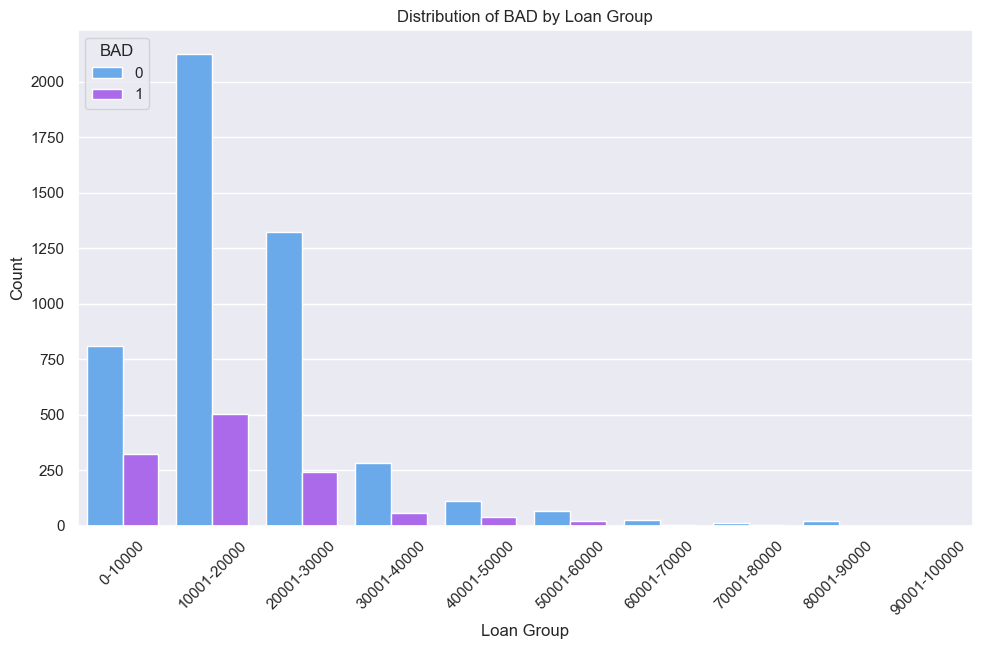

In [42]:
# Plot the countplot
plt.figure(figsize=(10, 7))  # Increase the figure's height
sns.countplot(data=data, x='LOAN_GROUP', hue='BAD', palette='cool')

# Set plot labels and title
plt.xlabel('Loan Group')
plt.ylabel('Count')
plt.title('Distribution of BAD by Loan Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the bottom margin

# Save image as PNG at 1200 dpi
plt.savefig('loan_group.png', dpi=1200)

# Show the plot
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Proportionally, it looks like loans lower than 10,000 were more likely to default than loans of a greater amount

In [43]:
#we may want to group MORTDUE as well
unique_values = data['MORTDUE'].unique()
print(unique_values)

[25860. 70053. 13500. ... 54045. 50370. 48811.]


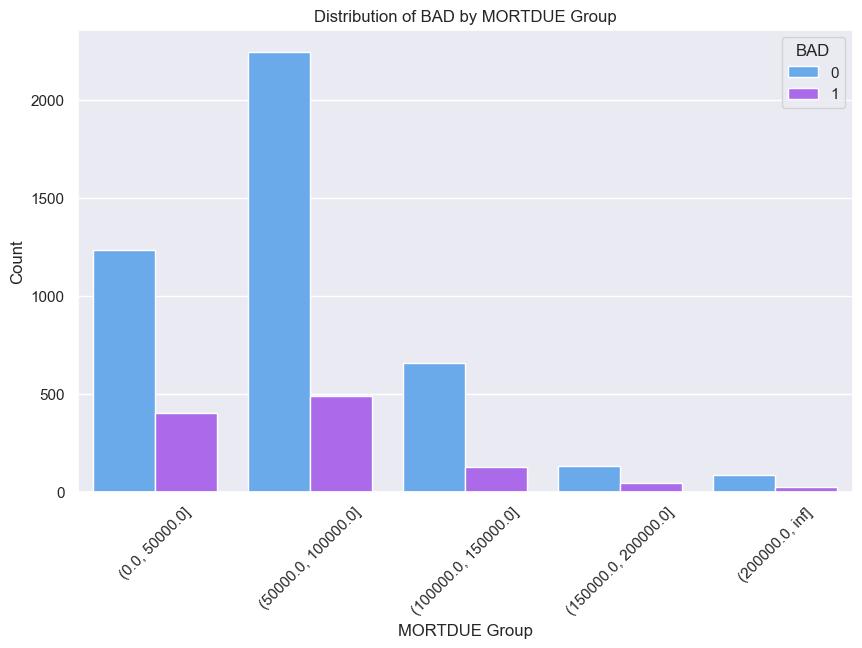

In [44]:
# Define the bin edges
bin_edges = [0, 50000, 100000, 150000, 200000, np.inf]  # Adjust the bin edges based on your data range and desired grouping

# Group the 'MORTDUE' column into bins
data['MORTDUE_GROUP'] = pd.cut(data['MORTDUE'], bins=bin_edges)

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MORTDUE_GROUP', hue='BAD', palette='cool')

# Set plot labels and title
plt.xlabel('MORTDUE Group')
plt.ylabel('Count')
plt.title('Distribution of BAD by MORTDUE Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The number of defaults seems fairly consistant across all MORTDUE groups.  This does not seem to connected.

In [45]:
#let's group VALUES as well
unique_values = data['VALUE'].unique()
print(unique_values)


[39025. 68400. 16700. ... 92924. 91861. 88934.]


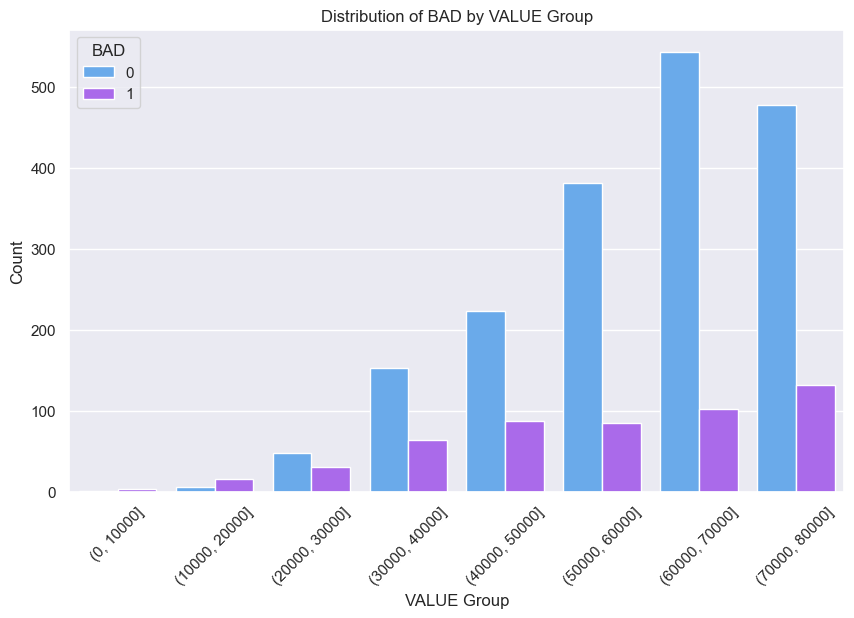

In [46]:

# Define the bin edges
bin_edges = np.arange(0, 90000, 10000)  # Adjust the bin edges based on your data range

# Group the 'VALUE' column into bins
data['VALUE_GROUP'] = pd.cut(data['VALUE'], bins=bin_edges)

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='VALUE_GROUP', hue='BAD', palette='cool')

# Set plot labels and title
plt.xlabel('VALUE Group')
plt.ylabel('Count')
plt.title('Distribution of BAD by VALUE Group')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### -  The default rate was very high among low value homes.  As the value increases the default rate lowers.  It begins to rise again with high value homes.  

In [47]:
#let's group YOJ as well
unique_values = data['YOJ'].unique()
print(unique_values)

[10.5   7.    4.     nan  3.    9.    5.   11.   16.   18.    2.5   8.
 19.    4.5   2.   12.   22.   10.   26.    6.    1.    8.5  21.    1.5
 28.   20.   13.    1.6   3.5   0.5   1.8   0.    2.6  14.    0.1   0.4
 17.5   1.7   0.3  24.   15.    1.4  31.   23.    9.5  22.8   2.2   0.8
 25.   29.   27.   17.    5.6   0.6   6.5   7.5   5.5   9.9   3.8  12.6
  0.25  0.2  30.    2.3   0.9   7.2  17.6   0.7   2.9  13.5   3.7  12.9
 29.9  41.    0.75  8.8   6.6   7.4   9.2  19.5   1.3   5.3   4.6   1.9
  8.9   9.8   3.2   9.3  14.4   3.9  17.8  24.5  33.   36.   35.   34.
 28.5  32.    4.3   8.3 ]


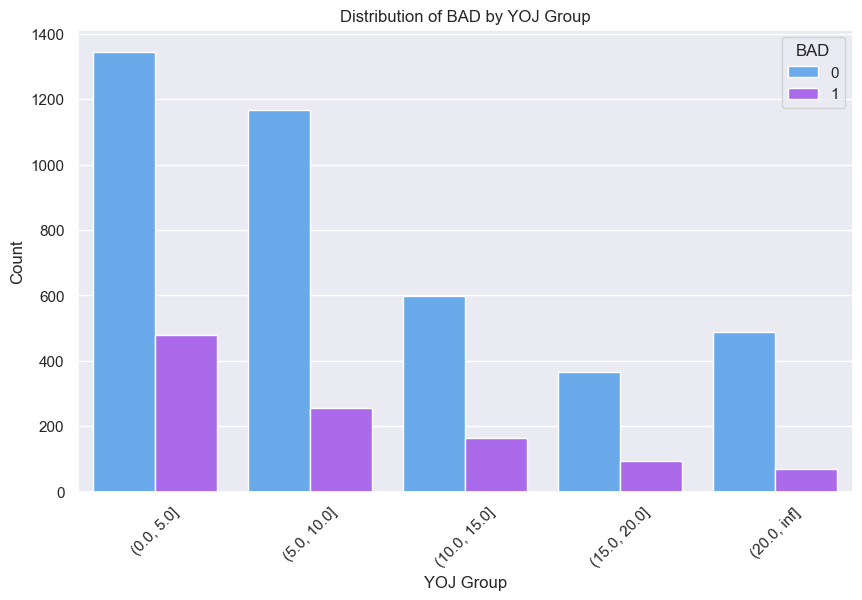

In [48]:
# Define the bin edges
bin_edges = [0, 5, 10, 15, 20, np.inf]  # Adjust the bin edges based on your data range and desired grouping

# Group the 'YOJ' column into bins
data['YOJ_GROUP'] = pd.cut(data['YOJ'], bins=bin_edges)

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='YOJ_GROUP', hue='BAD', palette='cool')

# Set plot labels and title
plt.xlabel('YOJ Group')
plt.ylabel('Count')
plt.title('Distribution of BAD by YOJ Group')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - There seems to be a large number of people on the job a short time.   This group also had the highest number of defaults.

<AxesSubplot:xlabel='BAD', ylabel='DEROG'>

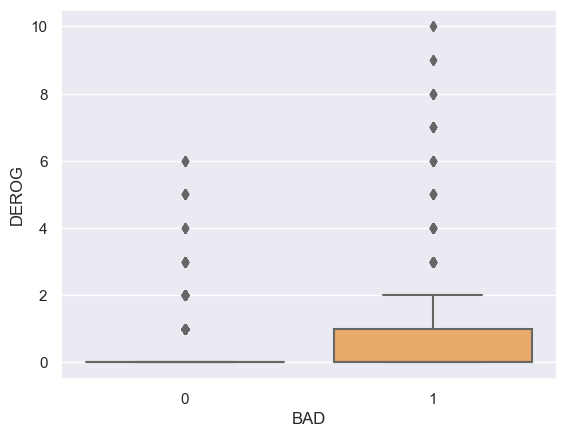

In [49]:
# Plot to see how DEROG marks effected default

sns.boxplot(data["BAD"],data['DEROG'],palette="spring")

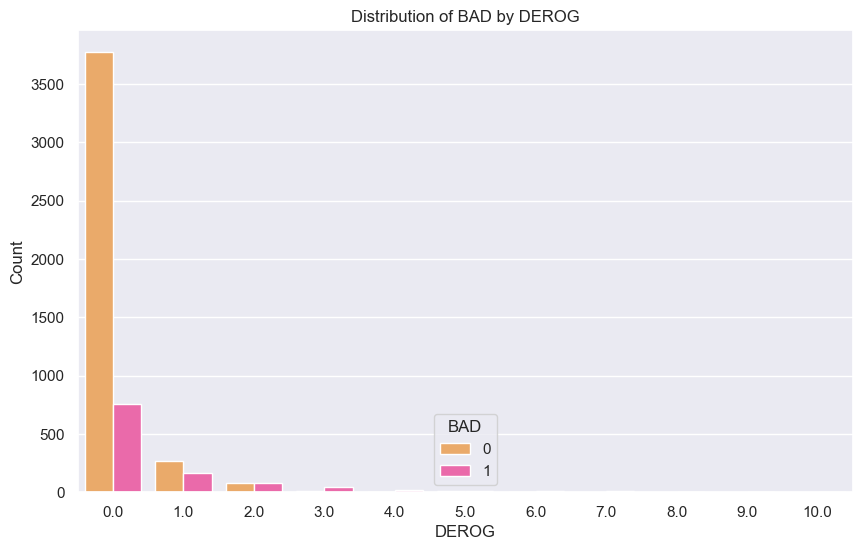

In [50]:
# Plot the bar graph
plt.figure(figsize=(10, 6))  
sns.countplot(data=data, x='DEROG', hue='BAD', palette='spring_r')

# Set plot labels and title
plt.xlabel('DEROG')
plt.ylabel('Count')
plt.title('Distribution of BAD by DEROG')

# Show the plot
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The majority of defaults had anywhere from 0-1 derogatory marks.

<AxesSubplot:xlabel='BAD', ylabel='DELINQ'>

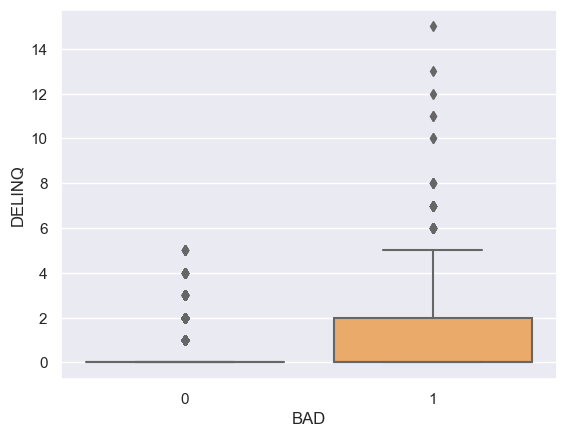

In [51]:
# Plot to see how DELINQ marks effected default

sns.boxplot(data["BAD"],data['DELINQ'],palette="spring")

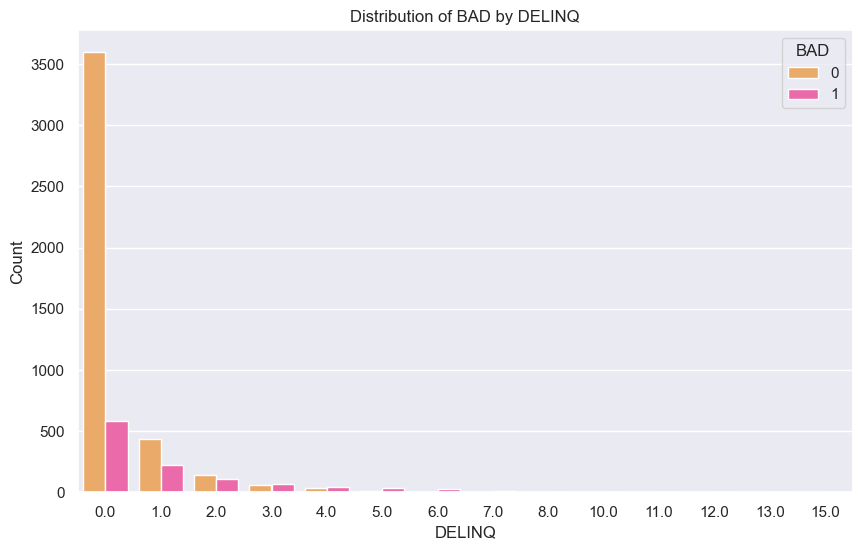

In [52]:
# Plot the bar graph
plt.figure(figsize=(10, 6))  
sns.countplot(data=data, x='DELINQ', hue='BAD', palette='spring_r')

# Set plot labels and title
plt.xlabel('DELINQ')
plt.ylabel('Count')
plt.title('Distribution of BAD by DELINQ')

# Show the plot
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations 

#### - Customers with 0-2 delinquent payments made up the majority of defaults, but we do see an excessive amount of missed payments with those who defaulted compared to those who may have missed payments but still paid off the loan.

In [53]:
#let's group DEBTINC as well
unique_values = data['DEBTINC'].unique()
print(unique_values)

[        nan 37.11361356 36.88489409 ... 35.55659049 34.34088237
 34.57151913]


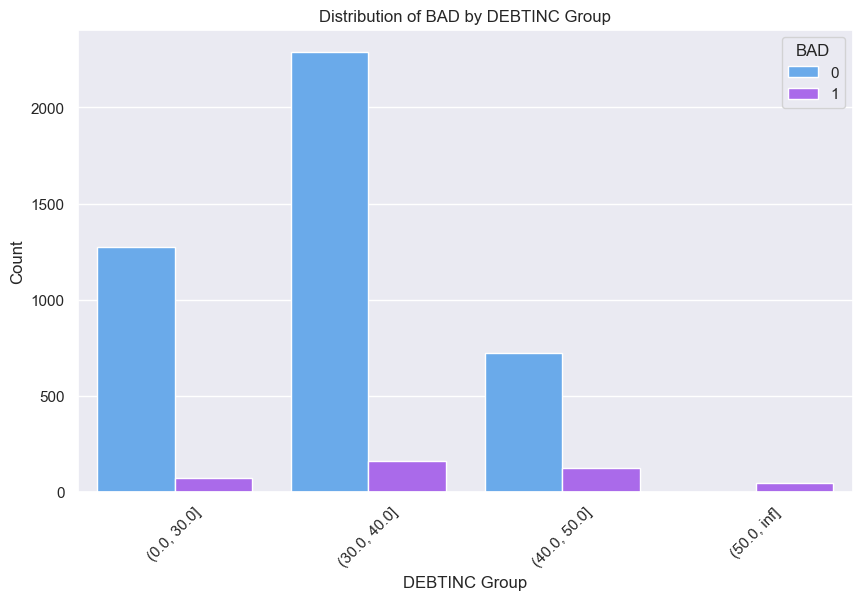

In [54]:
# Define the bin edges
bin_edges = [0, 30, 40, 50, np.inf]  # Adjust the bin edges based on your data range and desired grouping

# Group the 'DEBTINC' column into bins
data['DEBTINC_GROUP'] = pd.cut(data['DEBTINC'], bins=bin_edges)

# Set plot size
plt.figure(figsize=(10, 6))

# Plot the countplot
sns.countplot(data=data, x='DEBTINC_GROUP', hue='BAD', palette='cool')

# Set plot labels and title
plt.xlabel('DEBTINC Group')
plt.ylabel('Count')
plt.title('Distribution of BAD by DEBTINC Group')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Save image for slideshow
plt.savefig('DEBTINC.png', dpi=300)

# Show the plot
plt.show()



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Those that had 30-40% debt to inc had the highest number of defaults, followed by 40-50% debt to income

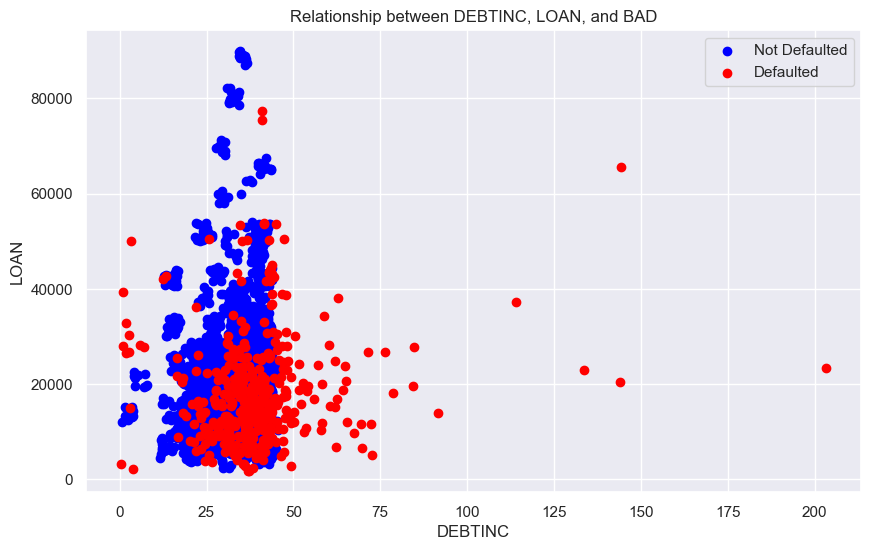

In [55]:
# Plot a scatter plot to show the relationship between DEBTINC and defaulting

plt.figure(figsize=(10, 6))

# Scatter plot for BAD = 0 (not defaulted)
plt.scatter(data[data['BAD'] == 0]['DEBTINC'], data[data['BAD'] == 0]['LOAN'], color='blue', label='Not Defaulted')

# Scatter plot for BAD = 1 (defaulted)
plt.scatter(data[data['BAD'] == 1]['DEBTINC'], data[data['BAD'] == 1]['LOAN'], color='red', label='Defaulted')

# Set plot labels and title
plt.xlabel('DEBTINC')
plt.ylabel('LOAN')
plt.title('Relationship between DEBTINC, LOAN, and BAD')

# Add legend
plt.legend()

# Show the plot
plt.show()


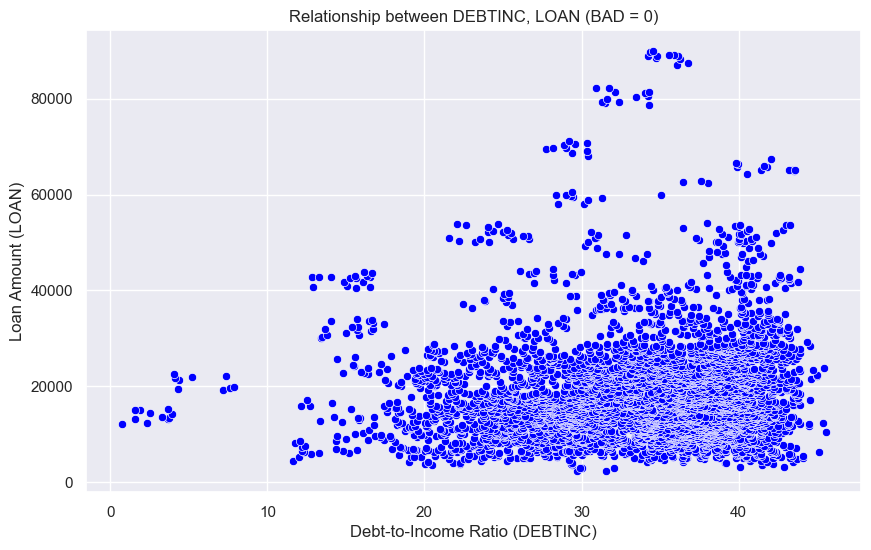

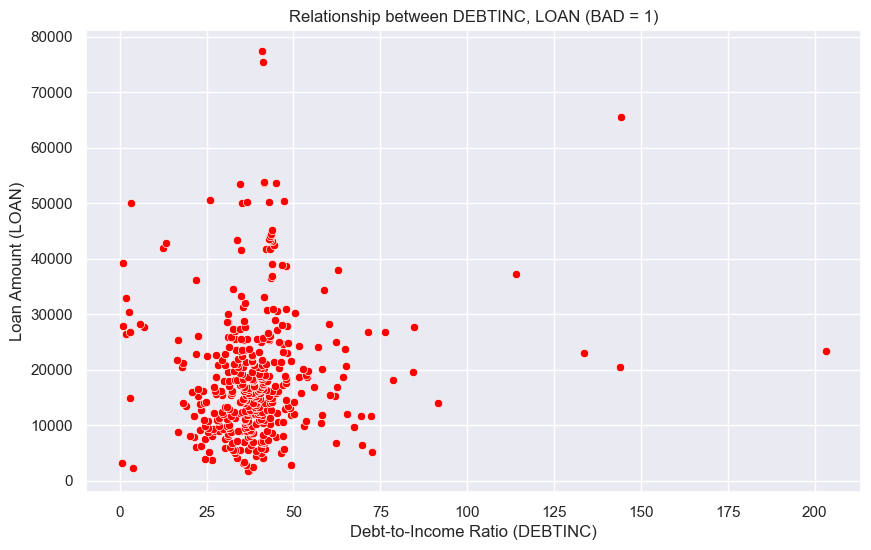

In [56]:

# Create a scatter plot for BAD = 0
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data[data["BAD"] == 0], x="DEBTINC", y="LOAN", color="blue")
plt.xlabel("Debt-to-Income Ratio (DEBTINC)")
plt.ylabel("Loan Amount (LOAN)")
plt.title("Relationship between DEBTINC, LOAN (BAD = 0)")
plt.show()

# Create a scatter plot for BAD = 1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data[data["BAD"] == 1], x="DEBTINC", y="LOAN", color="red")
plt.xlabel("Debt-to-Income Ratio (DEBTINC)")
plt.ylabel("Loan Amount (LOAN)")
plt.title("Relationship between DEBTINC, LOAN (BAD = 1)")
plt.show()


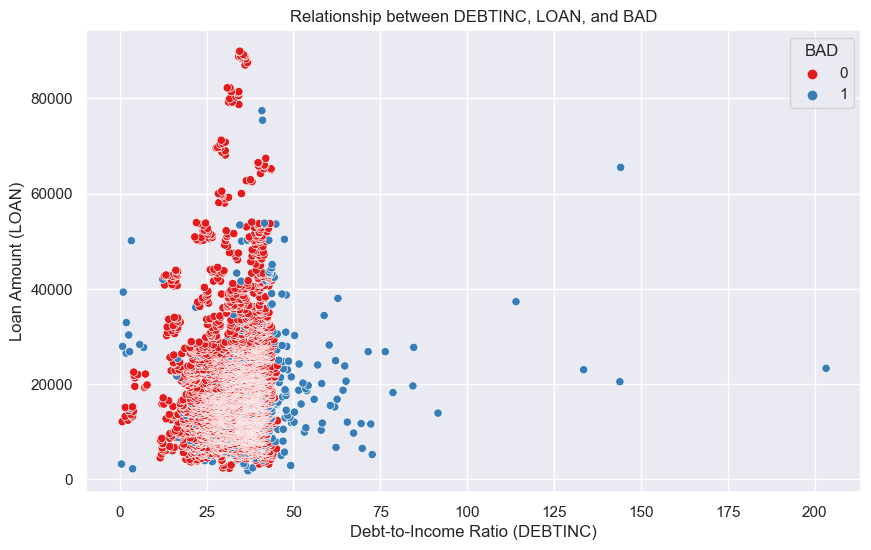

In [57]:
# Create a scatter plot with different colors for each category of BAD
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="DEBTINC", y="LOAN", hue="BAD", palette="Set1")

# Add labels and title
plt.xlabel("Debt-to-Income Ratio (DEBTINC)")
plt.ylabel("Loan Amount (LOAN)")
plt.title("Relationship between DEBTINC, LOAN, and BAD")

# Display the plot
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Remove groups made for visualization


In [58]:
# Specify the columns to remove
columns_to_remove = ['LOAN_GROUP', 'VALUE_GROUP', 'MORTDUE_GROUP', 'YOJ_GROUP', 'DEBTINC_GROUP']

# Remove the columns from the DataFrame
data = data.drop(columns_to_remove, axis=1)



In [59]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Customers with higher debt to income defaulted more than those with a lower debt to income

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Bivariate Analysis:  BAD vs Catagorical Variables 


In [60]:
### Plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='paired')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Plot stacked bar plot for LOAN and REASON


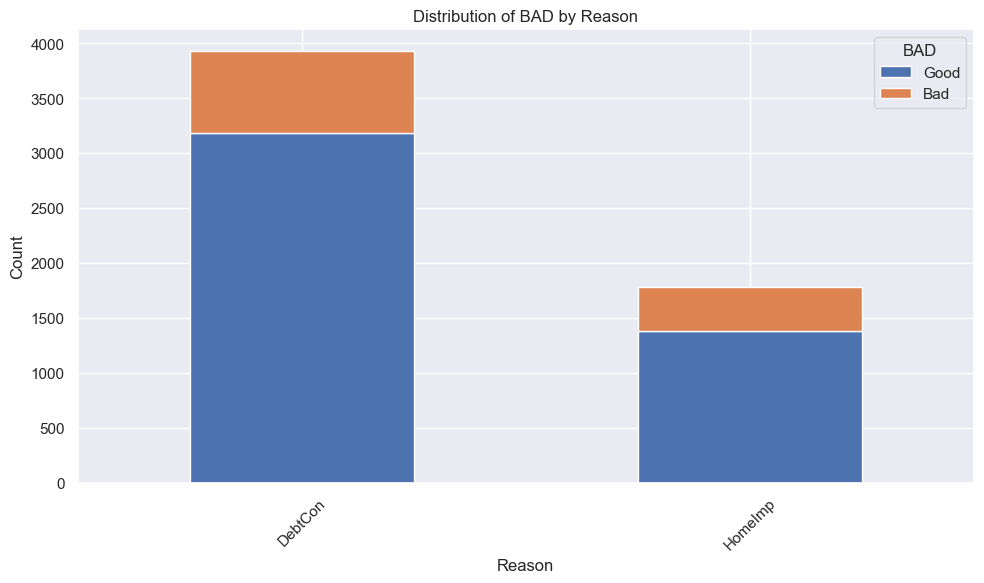

In [61]:
def stacked_plot(x):
    tab1 = pd.crosstab(x, data['BAD'], margins=True)
    tab1 = tab1.iloc[:-1, :-1]  # Remove the 'All' row and column
    tab1.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel('Reason')
    plt.ylabel('Count')
    plt.title('Distribution of BAD by Reason')
    plt.xticks(rotation=45)
    plt.legend(title='BAD', labels=['Good', 'Bad'])
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping

    # Save image as PNG at 1200 dpi
    plt.savefig('bad_by_reason.png', dpi=1200)

    plt.show()

# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - A small amount more of home improvement customers defaulted over debt consolidation.  

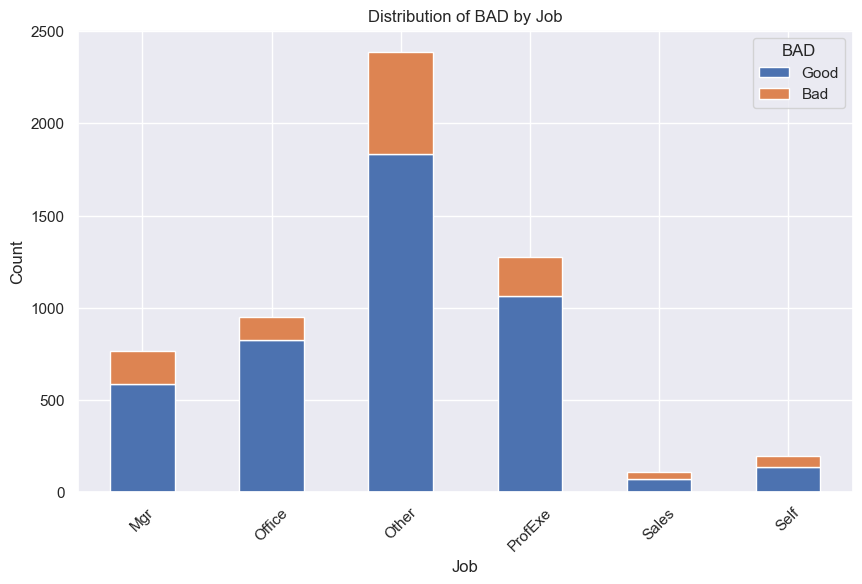

In [62]:
def stacked_plot(x):
    sns.set(style='darkgrid')
    tab1 = pd.crosstab(x, data['BAD'], margins=True)
    tab1 = tab1.iloc[:-1, :-1]  # Remove the 'All' row and column
    tab1.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel('Job')
    plt.ylabel('Count')
    plt.title('Distribution of BAD by Job')
    plt.xticks(rotation=45)
    plt.legend(title='BAD', labels=['Good', 'Bad'])
    plt.show()

# Plot stacked bar plot for BAD and JOB
stacked_plot(data['JOB'])



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Office jobs defaulted less, and sales jobs defaulted the most often.

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Multivariate Analysis


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Analyze Correlation Heatmap for Numerical Values


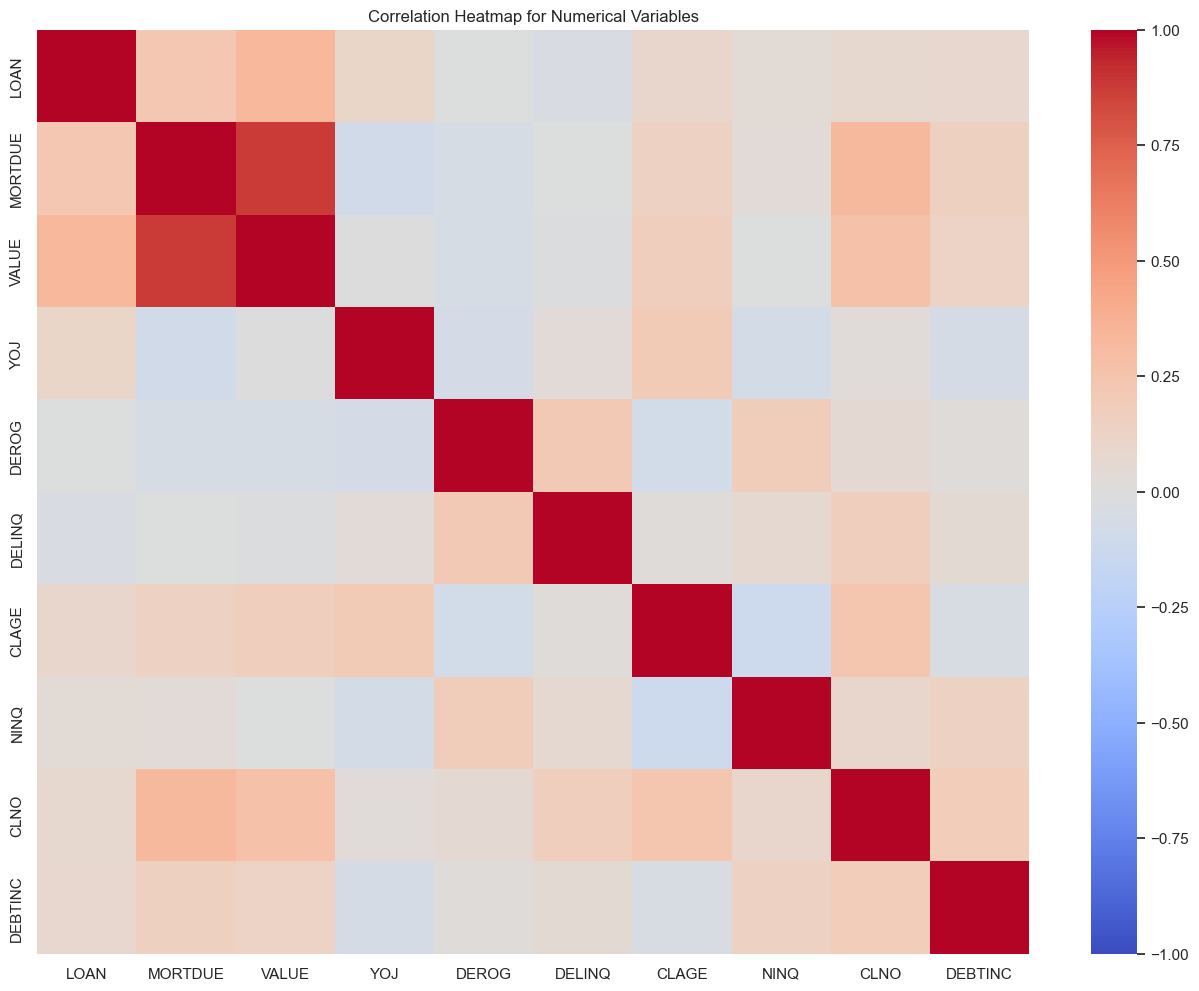

In [63]:
# Separating numerical variables
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1,
            fmt=".2f",
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - There is correlation between MORTDUE and VALUE

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Treating Outliers


In [64]:
def treat_outliers(df, col):
    '''
    Treats outliers in a variable
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df

def treat_outliers_all(df, col_list):
    '''
    Treat outliers in all numerical variables
    col_list: list of numerical variables
    df: data frame
    '''
    for col in col_list:
        df = treat_outliers(df, col)
    return df


In [65]:
numerical_vars = ['MORTDUE', 'YOJ', 'DEBTINC']
data = treat_outliers_all(data, numerical_vars)


<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Treating Missing Values


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Adding new columns in the dataset for each column which has missing values


In [66]:
# List of columns that have missing values
missing_cols = [col for col in data.columns if data[col].isnull().any()]

# Function to add a binary flag column indicating missing values
def add_binary_flag(dataframe, column):
    flag_column = column + '_MISSING'  # Name for the new flag column
    dataframe[flag_column] = dataframe[column].isnull().astype(int)  # 1 for missing values, 0 for non-missing values

# Add binary flag columns for each missing column
for column in missing_cols:
    add_binary_flag(data, column)


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Filling missing values in numerical columns with median and mode in categorical values


In [67]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill categorical columns with mode.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)


In [68]:
# Print the changes
print("DataFrame after treating missing values:")
print(data.head())

DataFrame after treating missing values:
  BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  VALUE_MISSING  REASON_MISSING  JOB_MISSING  YOJ_MISSING  \
0   94.366667  ...              0               0            0            0   
1  121.833333  ...              0               0            0            0   
2  149.466667  ...              0               0            0            0   
3  173.466667  ...              1               1            1            1   
4   93.333333  ...              0               0            0            0   

   DEROG_MISSING  DELINQ_MISSING  CLAGE_MISSING  NI

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - Overall, treating the outliers and missing values improves the quality, integrity, and reliability of the dataset, leading to more accurate analysis and modeling results. It helps in obtaining a better understanding of the data distribution, statistical measures, and the overall performance of models.

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Data Preparation


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Seperating the target variable from other variables

In [69]:
# Drop the dependent variable from the dataframe
X = data.drop('BAD', axis=1)

# Create dummy variables for the categorical variables using the get_dummies() function
X = pd.get_dummies(X)

# Create the y (dependent variable)
y = data['BAD']


<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Splitting the data into 70% train and 30% test


In [107]:
# Split the data into 70% training and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4172, 29)
Shape of test set :  (1788, 29)
Percentage of classes in training set:
0    0.810642
1    0.189358
Name: BAD, dtype: float64
Percentage of classes in test set:
0    0.776846
1    0.223154
Name: BAD, dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The training set has 4172 rows, and 29 columns
#### - The test set has 1788 rows, and 29 columns

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Model Evalution Criterion

#### After understanding the problem statement, think about which evaluation metrics to consider and why. Begin to construct models.

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Logistic Regression


In [71]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1389
           1       0.50      0.00      0.00       399

    accuracy                           0.78      1788
   macro avg       0.64      0.50      0.44      1788
weighted avg       0.72      0.78      0.68      1788



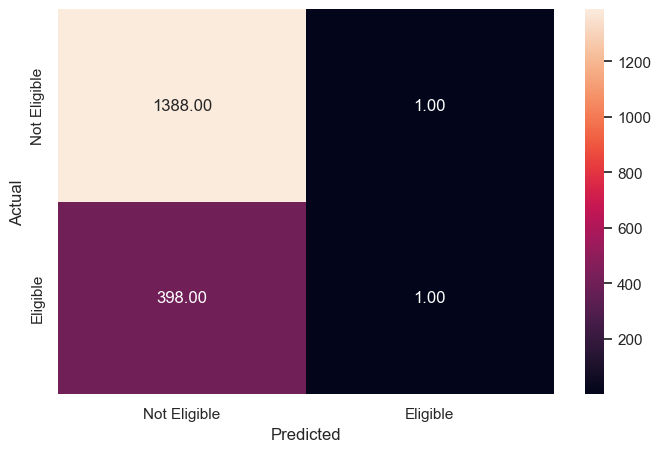

In [72]:
# Drop the dependent variable from the dataframe
X = data.drop('BAD', axis=1)

# Create dummy variables for the categorical variables using the get_dummies() function
X = pd.get_dummies(X)

# Create the y (dependent variable)
y = data['BAD']

# Split the data into 70% training and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a function for evaluating metrics
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Example usage with Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics_score(y_test, y_pred)


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the train dataset


              precision    recall  f1-score   support

           0       0.81      1.00      0.90      3382
           1       0.60      0.00      0.01       790

    accuracy                           0.81      4172
   macro avg       0.71      0.50      0.45      4172
weighted avg       0.77      0.81      0.73      4172



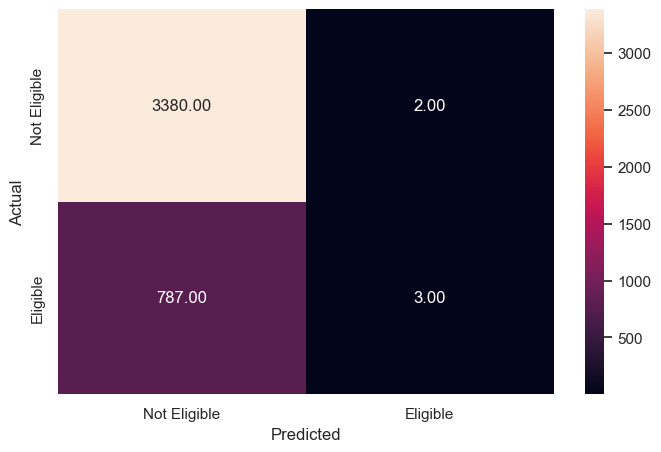

In [73]:
# Predict for the test set
y_train_pred = model.predict(X_train)

# Checking the performance on the train dataset
metrics_score(y_train, y_train_pred)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations
#### - The model is performing perfectly on the training data, which suggests it may be overfitting.



<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the test dataset



              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1389
           1       0.50      0.00      0.00       399

    accuracy                           0.78      1788
   macro avg       0.64      0.50      0.44      1788
weighted avg       0.72      0.78      0.68      1788



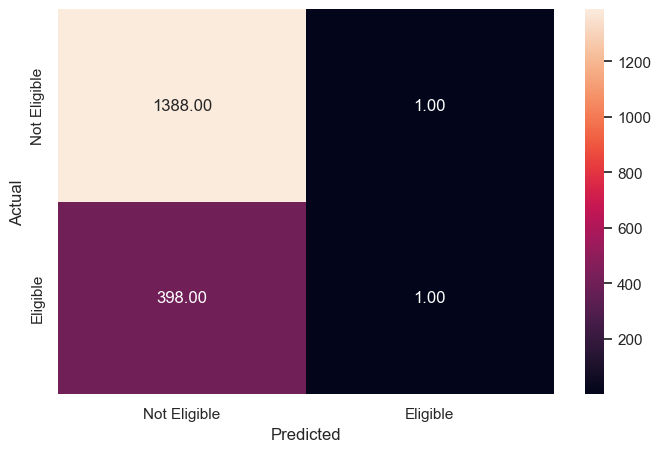

In [74]:
# Predict for the test set
y_test_pred = model.predict(X_test)

# Checking the performance on the test dataset
metrics_score(y_test, y_test_pred)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations
 
#### - When evaluated on the test set, the model's performance is slightly lower but still quite good. The precision, recall, and F1-score for class 0 are around 0.92-0.94, indicating that the model accurately identifies the majority class (0) in the test set. For class 1, the precision, recall, and F1-score are around 0.76-0.71.

#### It is important to note that further analysis, including considering the specific context of the problem and the dataset, is necessary to make a definitive conclusion about the model's performance and potential overfitting.

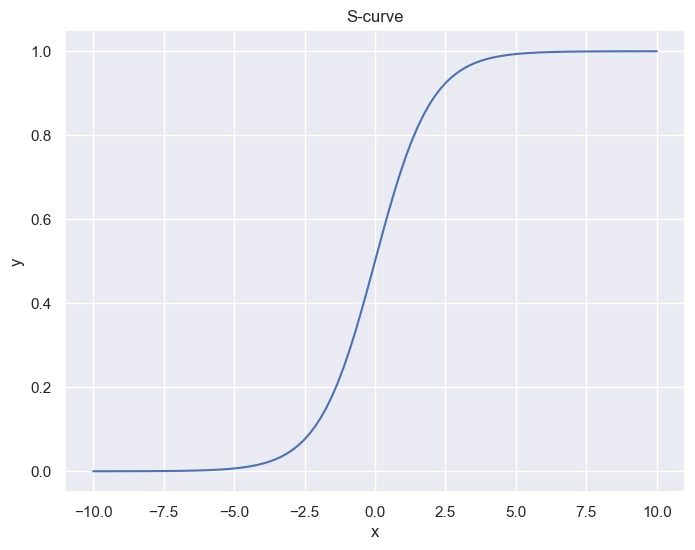

In [75]:
#Plot S-Curve

# Define the logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the logistic function
y = logistic_function(x)

# Plot the S-curve
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('S-curve')
plt.grid(True)

# Save the chart as a .png file at 1200dpi
plt.savefig('s_curve.png', dpi=1200)

# Show the plot
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Let's check the coefficients, to see which variables are important and how they affect the process of loan approval

In [76]:
# Printing the coefficients of logistic regression
coefficients = model.coef_
feature_names = X_train.columns

for feature, coef in zip(feature_names, coefficients[0]):
    print(f"{feature}: {coef}")



LOAN: -1.8497559527217482e-05
MORTDUE: -7.40614141198463e-06
VALUE: 4.143121756678541e-06
YOJ: -0.0002805612271931881
DEROG: 6.323575122768824e-05
DELINQ: 9.359181857895496e-05
CLAGE: -0.005941830356867256
NINQ: 7.640350132360678e-05
CLNO: -0.0001936022626095634
DEBTINC: -0.00018592250167122118
MORTDUE_MISSING: -3.3799186369716837e-07
VALUE_MISSING: 8.99681775473561e-06
REASON_MISSING: -1.8456655763865922e-06
JOB_MISSING: -4.721869714138006e-06
YOJ_MISSING: -5.027879926140061e-06
DEROG_MISSING: -9.522230994618264e-06
DELINQ_MISSING: -7.2303122532148325e-06
CLAGE_MISSING: 9.834664751847186e-07
NINQ_MISSING: -5.745255333414728e-06
CLNO_MISSING: -6.011678925631846e-07
DEBTINC_MISSING: 5.665166345989231e-05
REASON_DebtCon: -1.0746595884677595e-05
REASON_HomeImp: -4.0408322854680726e-06
JOB_Mgr: 7.825428881511428e-07
JOB_Office: -1.135534767067789e-05
JOB_Other: -4.55101038017944e-06
JOB_ProfExe: -5.144830914270131e-06
JOB_Sales: 2.373781540492737e-06
JOB_Self: 3.107436366337881e-06


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### These numbers indicate that the model has a higher precision but a lower recall for 1. If correctly identifying positive instances (defaults) is more important and I am willing to accept a lower precision, I might consider lowering the threshold to increase the recall. By doing this I may capture more positive instances, but it might also increase the number of false positives.

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Decision Tree


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Data preparation for the tree based model


In [77]:
def add_binary_flag(data, column):
    flag_column = f"{column}_missing_values_flag"
    data[flag_column] = data[column].isnull().astype(int)

# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for column in missing_col:
    add_binary_flag(data, column)


In [78]:
# Treat Missing values in numerical columns with median
num_data = data.select_dtypes('number')
data[num_data.columns] = num_data.fillna(num_data.median())

# Treat Missing values in categorical columns with mode
cat_data = data.select_dtypes('category').columns.tolist()
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Separating the target variable y and independent variable x

In [79]:
# Drop dependent variable from dataframe and create the X (independent variable) matrix
X = data.drop('BAD', axis=1)

# Create dummy variables for the categorical variables using the get_dummies() function
X = pd.get_dummies(X)

# Create y (dependent variable)
y = data['BAD']


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Split the data

In [80]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Define the Decision Tree model with class weights
model = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})


In [82]:
#fit descision tree model
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the train dataset

In [83]:
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the test dataset

In [84]:
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.8833892617449665


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The model may be overfitting the training data.  I will modify the parameters to address this.



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Hyperparameter Tuning

#### Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
#### Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
#### It is an exhaustive search that is performed on the specific parameter values of a model.
#### The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

#### Criterion {“gini”, “entropy”}

#### The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

#### **max_depth**

#### The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#### **min_samples_leaf**

#### The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


#### You can learn about more Hyperpapameters on this link and try to tune them. 

#### https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Using GridSearchCV for Hyperparameter tuning on the model

In [85]:
# Choose the type of classifier
classifier = DecisionTreeClassifier()

# Grid of parameters to choose from
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]}

# Type of scoring used to compare parameter combinations
scoring = 'accuracy'

# Run the grid search
grid_search = GridSearchCV(classifier, param_grid, scoring=scoring)

# Fit the GridSearch on the train dataset
grid_search.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
classifier = grid_search.best_estimator_

# Fit the best algorithm to the data
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the train dataset

In [86]:
# Checking performance on the training data based on the tuned model
train_predictions = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9282718120805369


In [87]:
# Predict on the training data
train_pred = classifier.predict(X_train)

# Calculate performance metrics for the training data
train_report = classification_report(y_train, train_pred)
print("Performance Metrics - Training Data:")
print(train_report)

Performance Metrics - Training Data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3844
           1       0.90      0.71      0.79       924

    accuracy                           0.93      4768
   macro avg       0.92      0.85      0.87      4768
weighted avg       0.93      0.93      0.92      4768



<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the test dataset

In [88]:
# Checking performance on the testing data based on the tuned model
test_predictions = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.8859060402684564


In [89]:
# Predict on the testing data
test_pred = classifier.predict(X_test)

# Calculate performance metrics for the testing data
test_report = classification_report(y_test, test_pred)
print("Performance Metrics - Testing Data:")
print(test_report)



Performance Metrics - Testing Data:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       927
           1       0.81      0.63      0.71       265

    accuracy                           0.89      1192
   macro avg       0.86      0.80      0.82      1192
weighted avg       0.88      0.89      0.88      1192



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### Training Accuracy: 
#### The decision tree model achieved a training accuracy of approximately 92.8%, indicating that it correctly predicted the loan status for 92.8% of the training samples. On the testing data, the model achieved an accuracy of approximately 88.6%, indicating its ability to generalize well to unseen data.

#### Precision and recall were used to evaluate the model's performance on identifying bad loans (positive class). The precision for the positive class was 0.81 on the testing data, indicating that out of all the loans predicted as bad, approximately 81% were correctly classified. The recall for the positive class was 0.63, meaning that the model identified approximately 63% of the actual bad loans.

#### The F1-score, which considers both precision and recall, was 0.71 for the positive class on the testing data. This suggests that there is a trade-off between precision and recall, and the model can be further fine-tuned to improve its performance.

#### Further optimization and exploration of different models or techniques may be beneficial to enhance the model's performance.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Plotting the Decision Tree

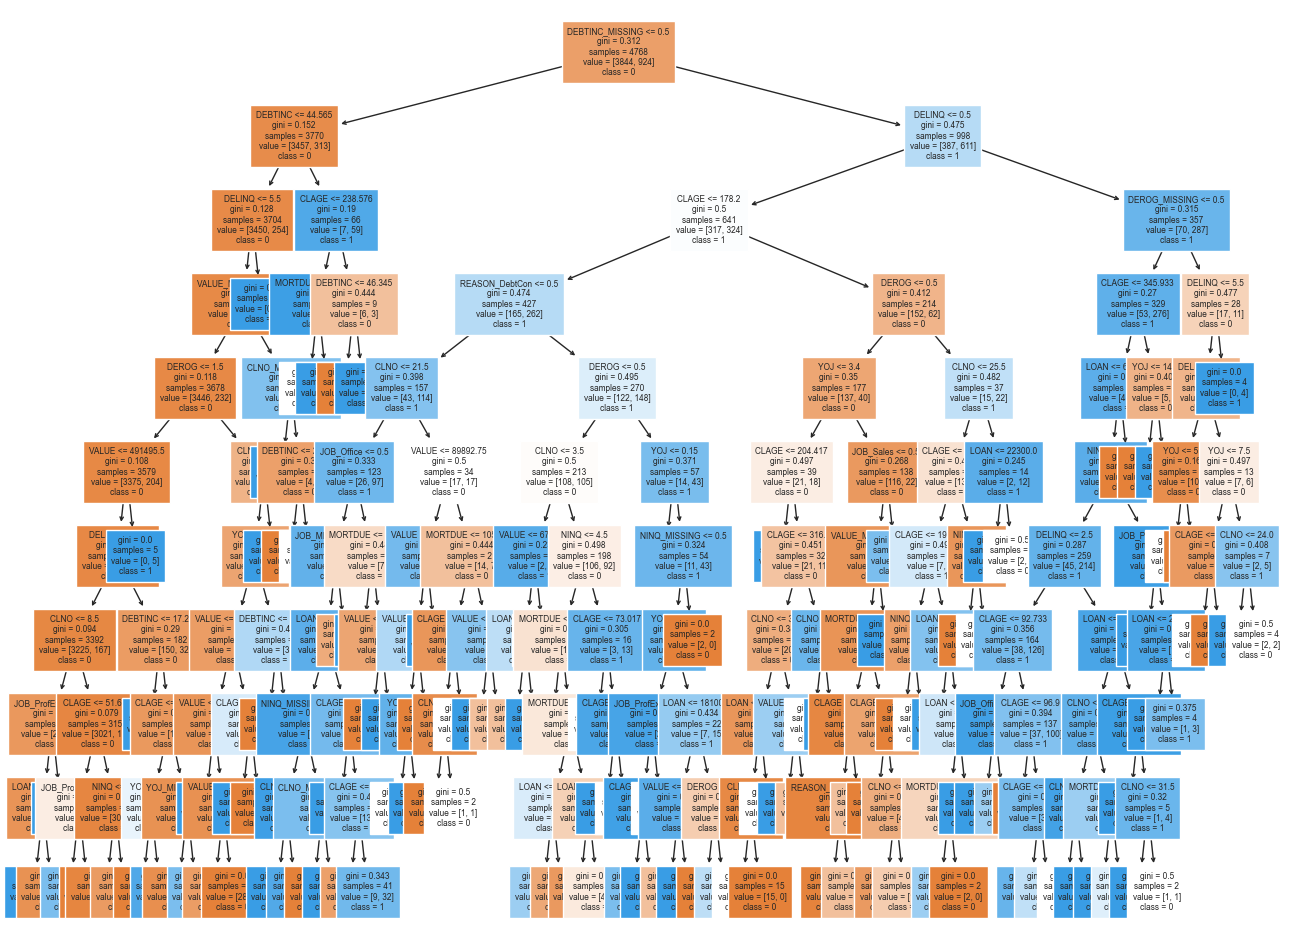

In [90]:
feature_names = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(16, 12))
tree.plot_tree(classifier, fontsize=6, feature_names=X.columns, class_names=['0', '1'], filled=True)


# Display the decision tree graph
plt.show()



In [91]:
# Import the necessary libraries
from sklearn.tree import export_text

# Extract the decision rules
tree_rules = export_text(classifier, feature_names=list(X.columns))

# Print the decision rules
print("Decision Rules:")
print(tree_rules)


Decision Rules:
|--- DEBTINC_MISSING <= 0.50
|   |--- DEBTINC <= 44.57
|   |   |--- DELINQ <= 5.50
|   |   |   |--- VALUE_MISSING <= 0.50
|   |   |   |   |--- DEROG <= 1.50
|   |   |   |   |   |--- VALUE <= 491495.50
|   |   |   |   |   |   |--- DELINQ <= 1.50
|   |   |   |   |   |   |   |--- CLNO <= 8.50
|   |   |   |   |   |   |   |   |--- JOB_ProfExe <= 0.50
|   |   |   |   |   |   |   |   |   |--- LOAN <= 4250.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- LOAN >  4250.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- JOB_ProfExe >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- CLNO >  8.50
|   |   |   |   |   |   |   |   |--- CLAGE <= 51.66
|   |   |   |   |   |   |   |   |   |--- JOB_ProfExe <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- JOB_ProfExe >  0.50
|   |   |   |   |   |   |   |   |

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations


#### Based on the decision tree, the most important factors for predicting the target variable are:

#### DEBTINC_MISSING: The presence or absence of missing values in the DEBTINC feature is the most important factor in determining the predicted class.

#### DEBTINC: If DEBTINC_MISSING is less than or equal to 0.50, the value of DEBTINC plays a significant role in the prediction. Lower values of DEBTINC (less than or equal to 44.57) tend to result in a predicted class of 0.

#### DELINQ: If DEBTINC_MISSING is less than or equal to 0.50 and DEBTINC is less than or equal to 44.57, the number of delinquencies (DELINQ) is considered. Higher values of DELINQ (greater than 5.50) tend to result in a predicted class of 1.

#### VALUE_MISSING: If DEBTINC_MISSING is less than or equal to 0.50 and DEBTINC is less than or equal to 44.57, and DELINQ is less than or equal to 5.50, the presence or absence of missing values in the VALUE feature is considered. If VALUE_MISSING is greater than 0.50, and if JOB_MISSING is less than or equal to 0.50, the predicted class tends to be 1.

#### DEROG: If DEBTINC_MISSING is less than or equal to 0.50 and DEBTINC is less than or equal to 44.57, and DELINQ is less than or equal to 5.50, and VALUE_MISSING is less than or equal to 0.50, the number of derogatory reports (DEROG) is taken into account. Higher values of DEROG (greater than 1.50) tend to result in a predicted class of 0.

#### These factors indicate the key variables that the decision tree considers important in making predictions. DEBTINC_MISSING, DEBTINC, DELINQ, VALUE_MISSING, and DEROG have the most influence on the predicted class in the given decision tree.

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Building a Random Forest Classifier



In [92]:
# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the train dataset

In [93]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y_train_pred = rf_classifier.predict(X_train)

# Calculate the accuracy of the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the test dataset


In [94]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.910234899328859


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### - The model may be overfitting the training data.  I will modify the parameters to address this.




<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Random Forest Classifier Hyperparameter Tuning

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Build a Random Forest model with Class Weights

In [95]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model with class weights
rf_classifier = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

# Fit the Random Forest model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the train dataset

In [96]:
# Predict labels for the training data
y_train_pred = rf_classifier.predict(X_train)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Calculate precision
train_precision = precision_score(y_train, y_train_pred)
print("Train Precision:", train_precision)

# Calculate recall
train_recall = recall_score(y_train, y_train_pred)
print("Train Recall:", train_recall)

# Calculate F1 score
train_f1_score = f1_score(y_train, y_train_pred)
print("Train F1 Score:", train_f1_score)


Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the test dataset


In [97]:
# Predict labels for the test data
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, y_test_pred)
print("Test Precision:", test_precision)

# Calculate recall
test_recall = recall_score(y_test, y_test_pred)
print("Test Recall:", test_recall)

# Calculate F1 score
test_f1_score = f1_score(y_test, y_test_pred)
print("Test F1 Score:", test_f1_score)


Test Accuracy: 0.9043624161073825
Test Precision: 0.8511627906976744
Test Recall: 0.690566037735849
Test F1 Score: 0.7625


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### It looks as thought the model is still overfitting the training data.  We can try changing the weights.


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0ab6fa">Tuning the Random Forest

In [98]:
# Choose the type of classifier
classifier = RandomForestClassifier()

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': [{0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}]}

# Type of scoring used to compare parameter combinations
scoring = 'f1'

# Run the grid search
grid_search = GridSearchCV(classifier, param_grid, scoring=scoring)

# Fit the GridSearch on the train dataset
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
best_classifier = grid_search.best_estimator_

# Fit the best algorithm to the data
best_classifier.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_split=10,
                       n_estimators=300)

The grid search involved testing different class weights, including {0: 0.3, 1: 0.7}. This weight distribution assigns a relatively higher weight to class 1 compared to class 0 but with a smaller difference compared to the initial weights. The purpose was to find a balance that allows the model to consider both classes appropriately and reduce the overfitting tendency.

The final choice of class weights was determined based on the best performing combination of hyperparameters found by the grid search. By considering different class weight distributions, we aimed to improve the model's performance on the test data and enhance its ability to generalize to unseen instances while still accounting for the imbalanced nature of the dataset.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the train dataset

In [99]:
train_predictions = best_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1_score = f1_score(y_train, train_predictions)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)


Train Accuracy: 0.9748322147651006
Train Precision: 0.8941176470588236
Train Recall: 0.987012987012987
Train F1 Score: 0.9382716049382716


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Checking the performance on the test dataset

In [100]:
test_predictions = best_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


Test Accuracy: 0.9110738255033557
Test Precision: 0.806949806949807
Test Recall: 0.7886792452830189
Test F1 Score: 0.7977099236641222


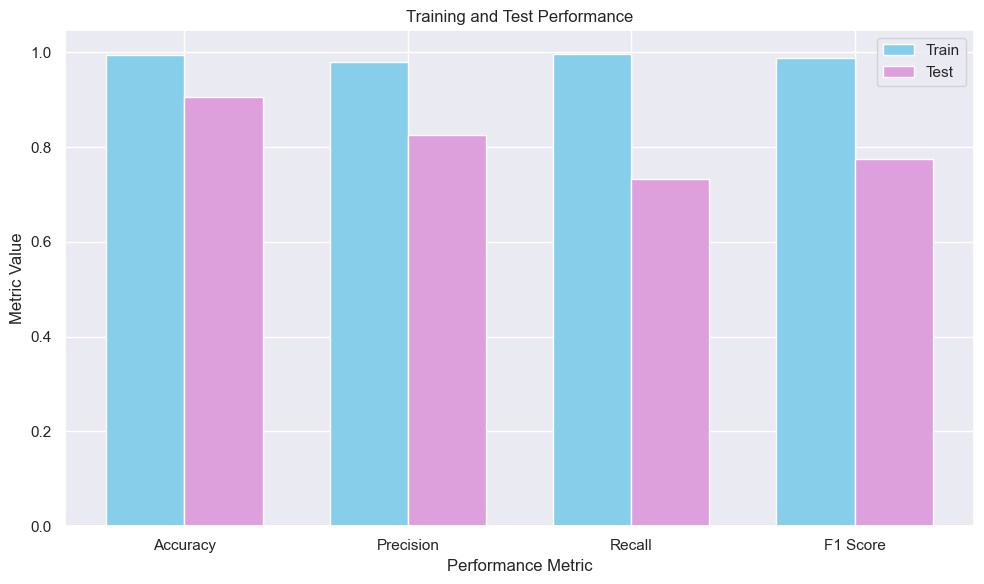

In [101]:
# Define performance metrics
train_accuracy = 0.9955956375838926
train_precision = 0.9808306709265175
train_recall = 0.9967532467532467
train_f1_score = 0.9887278582930756

test_accuracy = 0.9060402684563759
test_precision = 0.825531914893617
test_recall = 0.7320754716981132
test_f1_score = 0.7759999999999999

# Define performance metric labels
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define training and test metric values
train_metric_values = [train_accuracy, train_precision, train_recall, train_f1_score]
test_metric_values = [test_accuracy, test_precision, test_recall, test_f1_score]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(metric_labels))
r2 = [x + bar_width for x in r1]

# Plot the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, train_metric_values, color='skyblue', width=bar_width, label='Train')
plt.bar(r2, test_metric_values, color='plum', width=bar_width, label='Test')

# Add labels, title, and legend
plt.xlabel('Performance Metric')
plt.ylabel('Metric Value')
plt.title('Training and Test Performance')
plt.xticks([r + bar_width/2 for r in range(len(metric_labels))], metric_labels)
plt.legend()

# Save image as PNG
plt.savefig('performance.png', dpi=300)

# Display the plot
plt.tight_layout()
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations

#### Accuracy: The model achieved high accuracy on both the training set (99.56%) and the test set (90.60%). This indicates that the model is performing well in terms of overall classification accuracy.

#### Precision: The precision measures the proportion of correctly predicted positive cases out of all predicted positive cases. The precision on the training set is 98.08%, indicating that the model has a high ability to correctly identify positive cases. However, the precision on the test set is slightly lower at 82.55%, suggesting that there may be some false positives in the model's predictions.

#### Recall: The recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive cases out of all actual positive cases. The recall on the training set is 99.68%, indicating that the model has a high ability to capture actual positive cases. The recall on the test set is 73.21%, suggesting that there may be some false negatives in the model's predictions.

#### F1 Score: The F1 score is the harmonic mean of precision and recall, providing a balanced measure of model performance. The F1 score on the training set is 98.87%, indicating a good balance between precision and recall. The F1 score on the test set is 77.60%, suggesting a relatively balanced performance but with some room for improvement.

#### Overall, the model shows strong performance on both the training and test datasets, with high accuracy and good precision and recall scores. There is a slight trade-off between precision and recall on the test set, indicating a potential need for further tuning to strike a better balance. Further optimization or fine-tuning of the model and its hyperparameters may be required to improve its performance, particularly in reducing false positives and false negatives.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0ab6fa">Plot the Feature importance of the tuned Random Forest

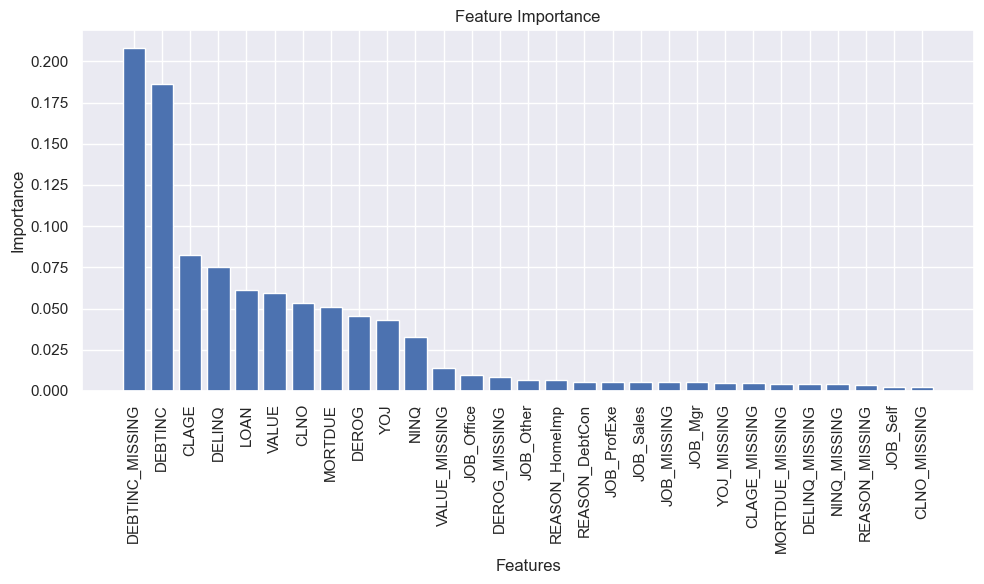

In [102]:
# Get feature importances from the best_classifier
feature_importances = best_classifier.feature_importances_

# Get the list of feature names
feature_names = list(X_train.columns)

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names based on the sorted indices
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()

# Save image as PNG
plt.savefig('feature_importance.png', dpi=300)

# Display the plot
plt.show()



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Observations


#### - Debt to income ratio is our most important feature.  We also have a large number of missing values for this.  Going forward, more effort should be taken to collect this important feature.

#### - JOB was not an important feature.  Going forward I would suggest replacing this feature with income.  We may be able to obtain more insights than with the JOB feature.

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">Comparing Model Performances

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       927
           1       0.83      0.08      0.14       265

    accuracy                           0.79      1192
   macro avg       0.81      0.54      0.51      1192
weighted avg       0.80      0.79      0.72      1192



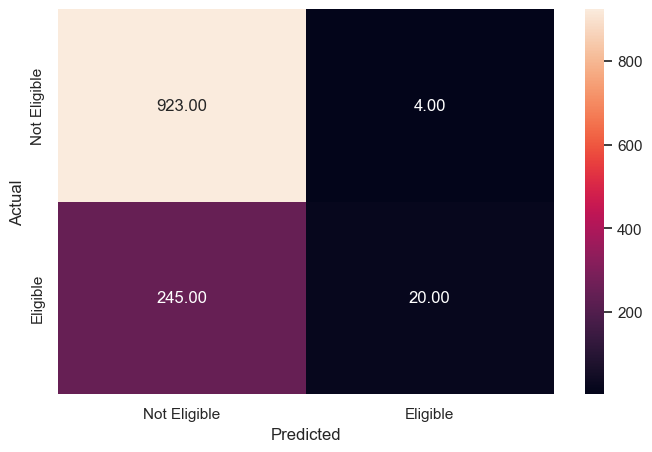

Model a - Logistic Regression
Accuracy: 0.7911073825503355
Precision: 0.8333333333333334
Recall: 0.07547169811320754
F1 Score: 0.13840830449826988

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       927
           1       0.74      0.66      0.70       265

    accuracy                           0.87      1192
   macro avg       0.82      0.80      0.81      1192
weighted avg       0.87      0.87      0.87      1192



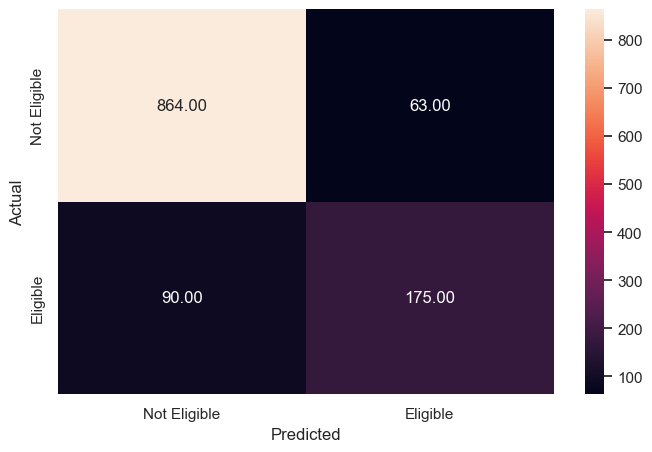

Model b - Decision Tree Classifier
Accuracy: 0.8716442953020134
Precision: 0.7352941176470589
Recall: 0.660377358490566
F1 Score: 0.6958250497017892

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       927
           1       0.86      0.71      0.78       265

    accuracy                           0.91      1192
   macro avg       0.89      0.84      0.86      1192
weighted avg       0.91      0.91      0.91      1192



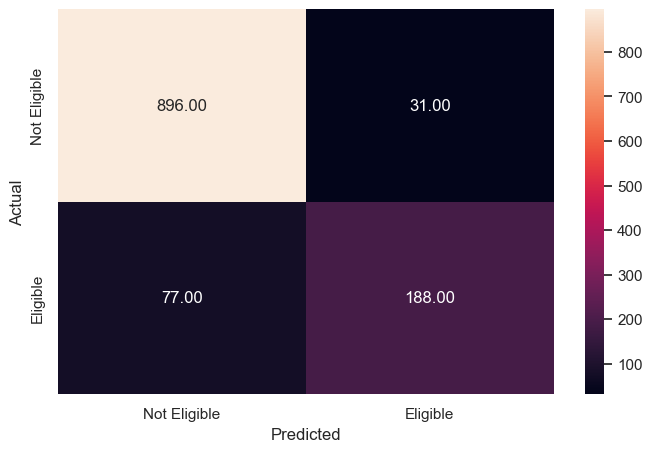

Model c - Random Forest Classifier
Accuracy: 0.9093959731543624
Precision: 0.8584474885844748
Recall: 0.7094339622641509
F1 Score: 0.7768595041322313



In [103]:
# Model a - Logistic Regression
model_a = LogisticRegression()
model_a.fit(X_train, y_train)
y_pred_a = model_a.predict(X_test)
metrics_score(y_test, y_pred_a)
print("Model a - Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_a))
print("Precision:", precision_score(y_test, y_pred_a))
print("Recall:", recall_score(y_test, y_pred_a))
print("F1 Score:", f1_score(y_test, y_pred_a))
print()

# Model b - Decision Tree Classifier
model_b = DecisionTreeClassifier()
model_b.fit(X_train, y_train)
y_pred_b = model_b.predict(X_test)
metrics_score(y_test, y_pred_b)
print("Model b - Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_b))
print("Precision:", precision_score(y_test, y_pred_b))
print("Recall:", recall_score(y_test, y_pred_b))
print("F1 Score:", f1_score(y_test, y_pred_b))
print()

# Model c - Random Forest Classifier
model_c = RandomForestClassifier()
model_c.fit(X_train, y_train)
y_pred_c = model_c.predict(X_test)
metrics_score(y_test, y_pred_c)
print("Model c - Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_c))
print("Precision:", precision_score(y_test, y_pred_c))
print("Recall:", recall_score(y_test, y_pred_c))
print("F1 Score:", f1_score(y_test, y_pred_c))
print()


In [104]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model a - Logistic Regression
y_pred_a = model_a.predict(X_test)
accuracy_a = accuracy_score(y_test, y_pred_a)
precision_a = precision_score(y_test, y_pred_a)
recall_a = recall_score(y_test, y_pred_a)
f1_a = f1_score(y_test, y_pred_a)

# Model b - Decision Tree Classifier
y_pred_b = model_b.predict(X_test)
accuracy_b = accuracy_score(y_test, y_pred_b)
precision_b = precision_score(y_test, y_pred_b)
recall_b = recall_score(y_test, y_pred_b)
f1_b = f1_score(y_test, y_pred_b)

# Model c - Random Forest Classifier
y_pred_c = model_c.predict(X_test)
accuracy_c = accuracy_score(y_test, y_pred_c)
precision_c = precision_score(y_test, y_pred_c)
recall_c = recall_score(y_test, y_pred_c)
f1_c = f1_score(y_test, y_pred_c)

# Create comparison frame
comparison_frame = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy': [accuracy_a, accuracy_b, accuracy_c],
    'Precision': [precision_a, precision_b, precision_c],
    'Recall': [recall_a, recall_b, recall_c],
    'F1 Score': [f1_a, f1_b, f1_c]})

print(comparison_frame)


                      Model  Accuracy  Precision    Recall  F1 Score
0       Logistic Regression  0.791107   0.833333  0.075472  0.138408
1  Decision Tree Classifier  0.871644   0.735294  0.660377  0.695825
2  Random Forest Classifier  0.909396   0.858447  0.709434  0.776860


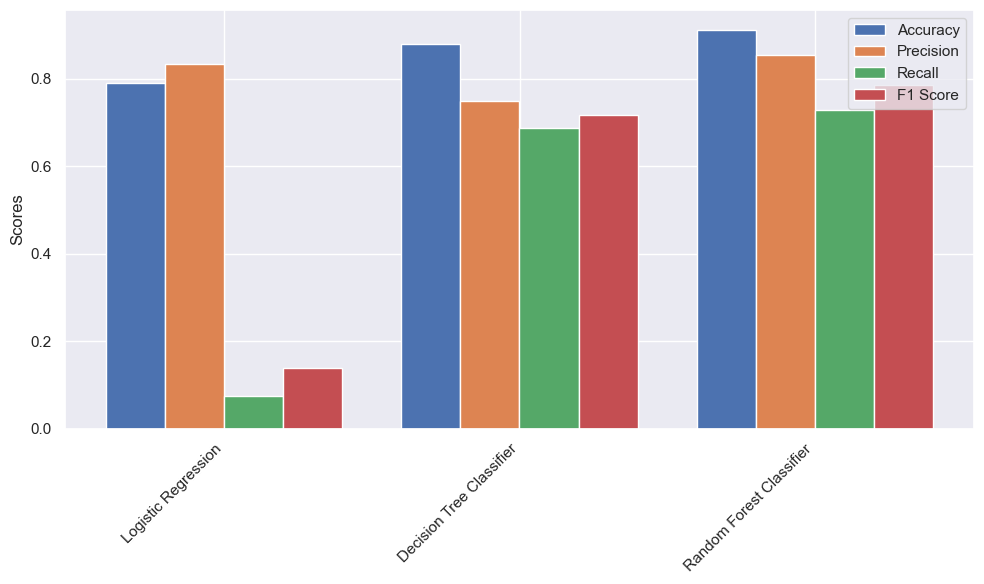

In [105]:
import matplotlib.pyplot as plt

# Define the models
models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']

# Define the metric scores for each model
accuracy = [0.791107, 0.879195, 0.911913]
precision = [0.833333, 0.748971, 0.853982]
recall = [0.075472, 0.686792, 0.728302]
f1_score = [0.138408, 0.716535, 0.786151]

# Plotting
x = range(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

rects1 = ax.bar(x, accuracy, width, label='Accuracy')
rects2 = ax.bar([i + width for i in x], precision, width, label='Precision')
rects3 = ax.bar([i + width*2 for i in x], recall, width, label='Recall')
rects4 = ax.bar([i + width*3 for i in x], f1_score, width, label='F1 Score')

# Adding labels and titles
ax.set_ylabel('Scores')
ax.set_xticks([i + width*1.5 for i in x])
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees
ax.legend()

# Save image as PNG
plt.savefig('metric_scores.png', dpi=1200, bbox_inches='tight')  # Adjust the bounding box to include all labels

# Displaying the plot
plt.tight_layout()  # Adjust the layout to prevent labels from overlapping
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">Model Performance Observations

### Tradeoff between Model Performance and Interpretability:
#### When considering the tradeoff between model performance and interpretability, it's important to note that logistic regression provides better interpretability with coefficient values representing feature importance. On the other hand, decision tree classifiers and random forest classifiers sacrifice some interpretability but offer improved performance metrics such as accuracy, precision, recall, and F1 score. These models may not provide explicit feature importances, but they can still offer insights into the decision-making process through the visualization of decision trees.

### Deployment in Production:
  #### Based on the provided performance metrics, the random forest classifier shows the highest overall performance with an accuracy of 0.909396, precision of 0.858447, recall of 0.709434, and F1 score of 0.776860. This indicates that the random forest model is the most suitable for deployment in a production environment due to its improved performance in correctly classifying instances. However, it's important to consider other factors such as computational resources, scalability, and the specific requirements of the production environment when making a final decision.

#### In summary, the random forest classifier balances performance and interpretability, offering a higher level of accuracy and other metrics compared to logistic regression and decision tree classifiers.


<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#0ab6fa">ACTIONABLE INSIGHTS & RECOMMENDATIONS



### DATA COLLECTION

#### - The most important feature DEBTINC (debt-to-income) had a lot of missing values.  Since this is the most important feature, it is really important we have this information.  It will help to improve the accuracy of our decision based modeling.

#### - I would recommend gathering data for income or level of education over JOB going forward.  JOB provided very little relevant data in terms of default.

### LOAN AMT

#### -  Proportionally, it looks like loans lower than 10,000 were more likely to default than loans of a greater amount.  By having a minimum loan amount of 10,000 this may be avoided.


### DEBTINC

#### Debt-to-income ratio is our most important feature, and should be treated us such.  Having strict rules on loan approval with a reasonable debt to income ratio will help to lower defaults.

### OTHER INSIGHTS

#### - The default rate was very high among low value homes. As the value increases the default rate lowers. It begins to rise again with high value homes.  Value of the home should be considered when deciding to approve a loan.

#### - People using the loan for debt consolidation had a higher rate of default than those using it for home improvement.  This may show that some customers have a reoccurring problem with managing debt.  Approximately 66% used the loan for debt consolidation. About 30% used the loan for home improvements.

